Assembling some uv data for Guangwei Fu.  

Stars: 
GJ 3470
WASP 107
WASP 39
HD 209458
HD 189733
WASP 121
WASP 127
HIP 67522

WASP 121 and HIP 67522 are finished Mega-MEATS targets. WASP 127 is a MEATS targets. 

WASP 39 has no COS/STIS UV data. It has WFC3 NUV data from a proposal that Guangwei is CoI on. WASP-107 only has some G140M data - Lya is detected but needs reextraction. Others have archival UV data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/'
stars = os.listdir(path)
stars

['GJ_3470', 'HD189733', 'HD209458', 'WASP-107', 'WASP-39']

GJ_3470
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/GJ_3470/hst_14843_cos_gj-3470_g130m-g160m-cg230l_ldcu_cspec.fits']


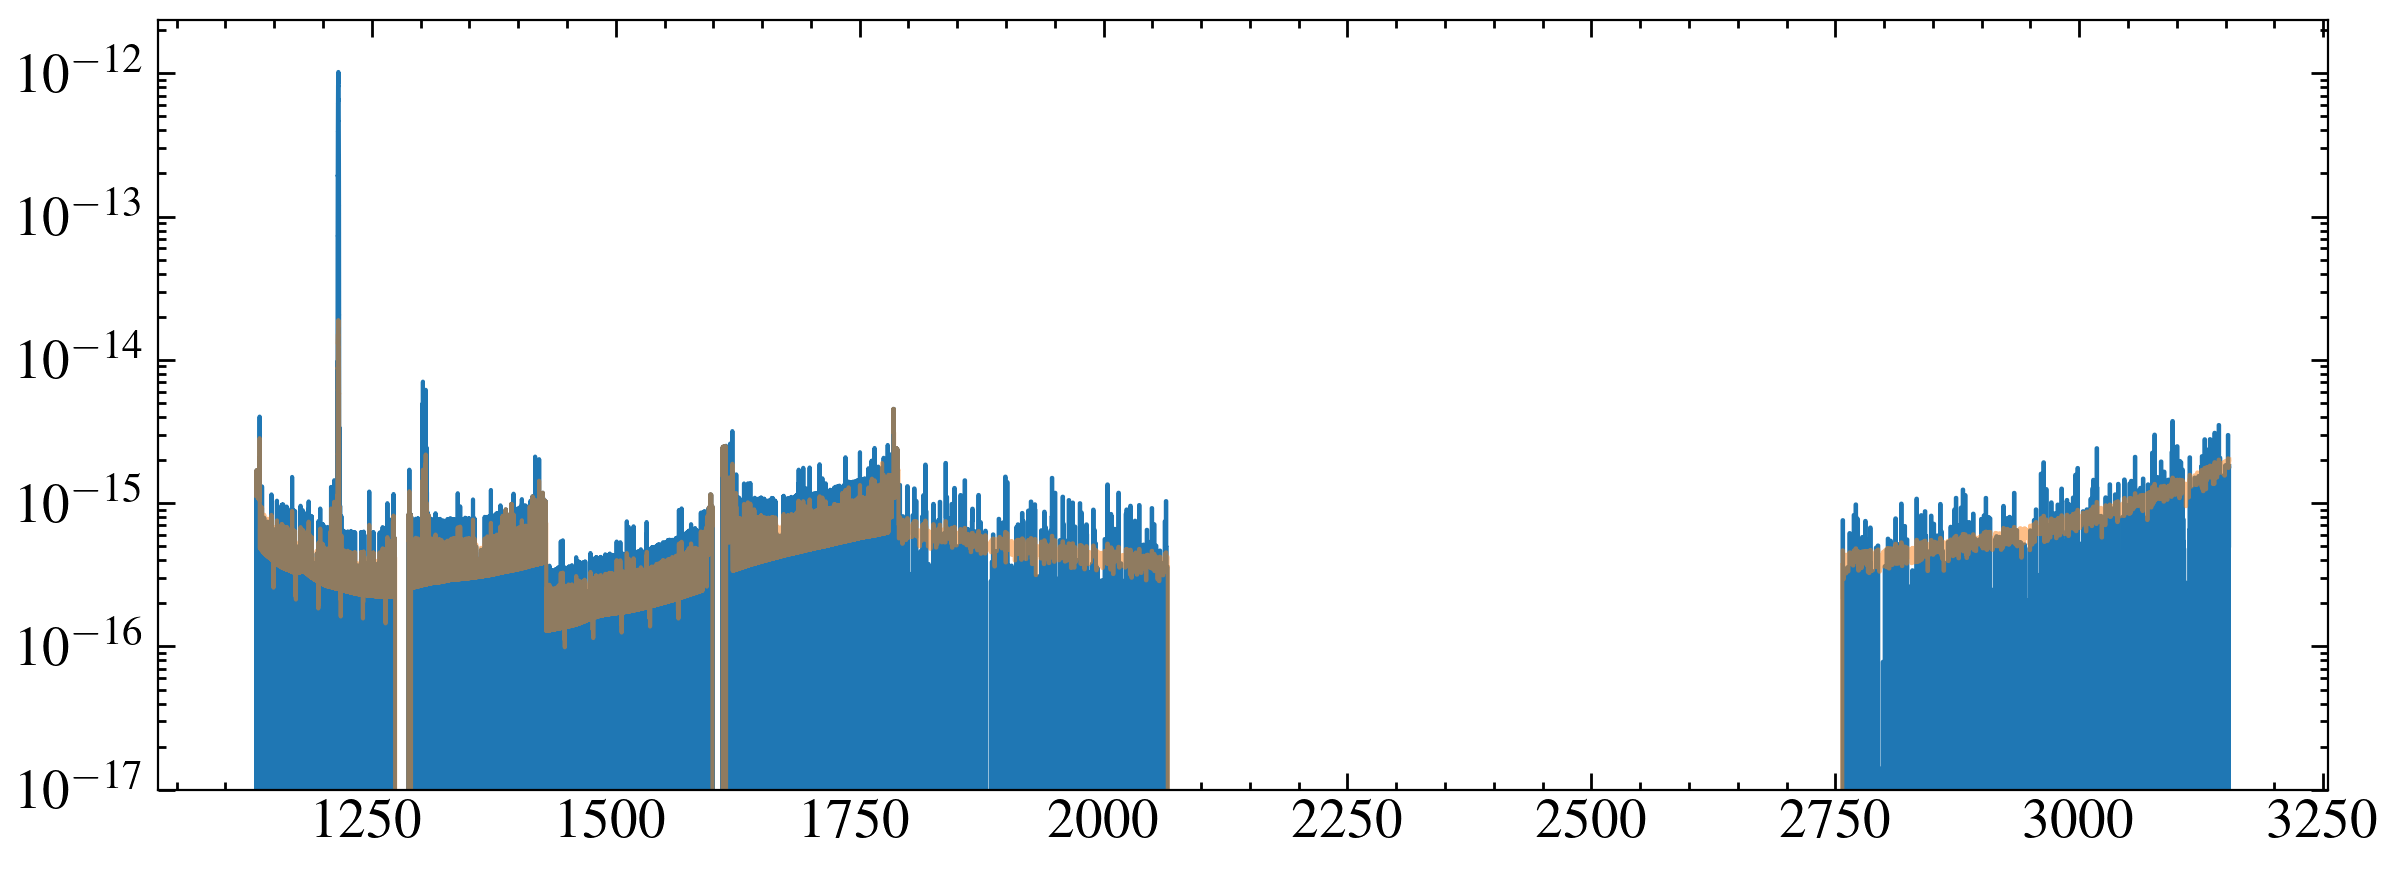

HD189733
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_11673_cos_hd-189733_g130m_lb5k_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_11673_stis_hd-189733_g140m_ob5k_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_12920_stis_hd-189733_g140m_oc1f_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_14767_cos_hd-189733_g130m_ld9m_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_15338_stis_hd-189733_e230m_odfv_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_15710_cos_hd-189733_g130m_ldzk_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_17157_stis_hd-189733_g140m_oewb_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_12984_cos_hd-189733_g130m_lc0u_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_16225_stis_hd189733_e230h_oee5_cspec.fits']


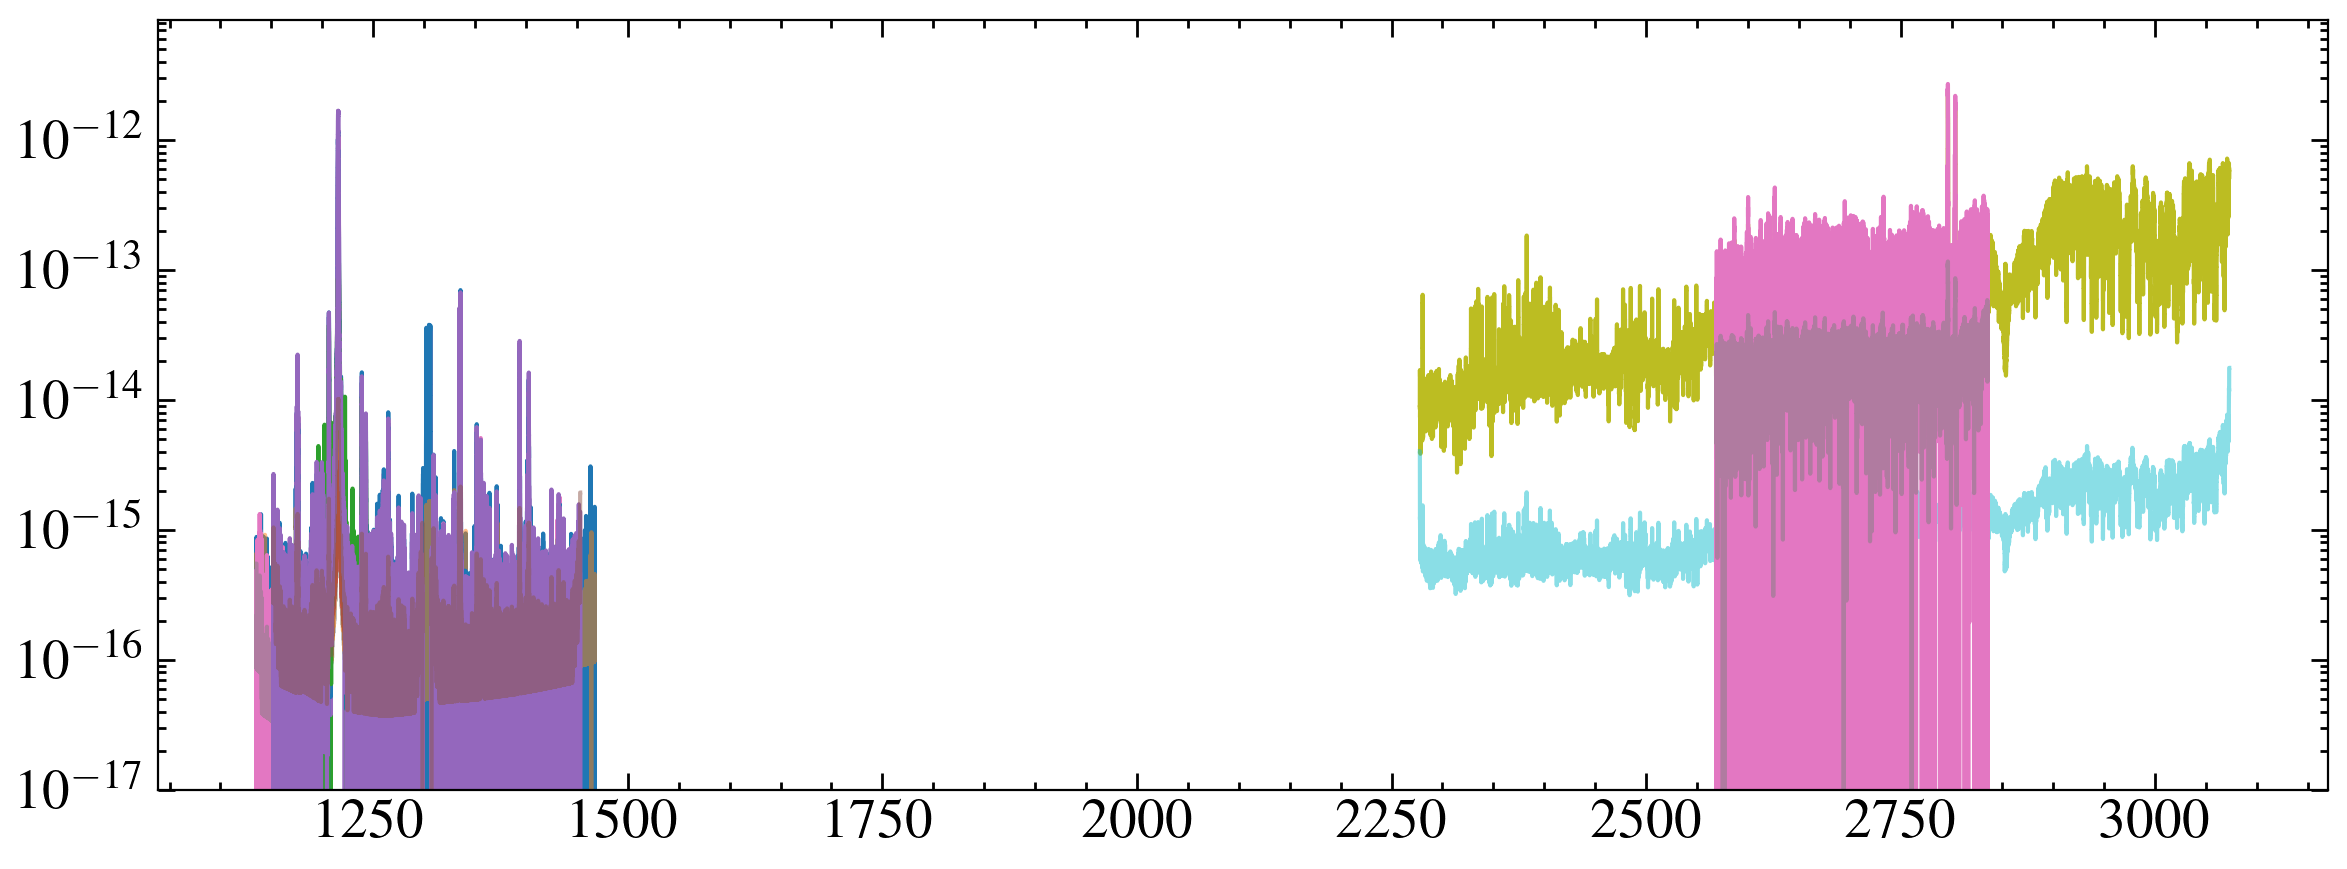

HD209458
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD209458/hst_11534_cos_hd-209458_g130m-g160m_lb4m_cspec.fits']


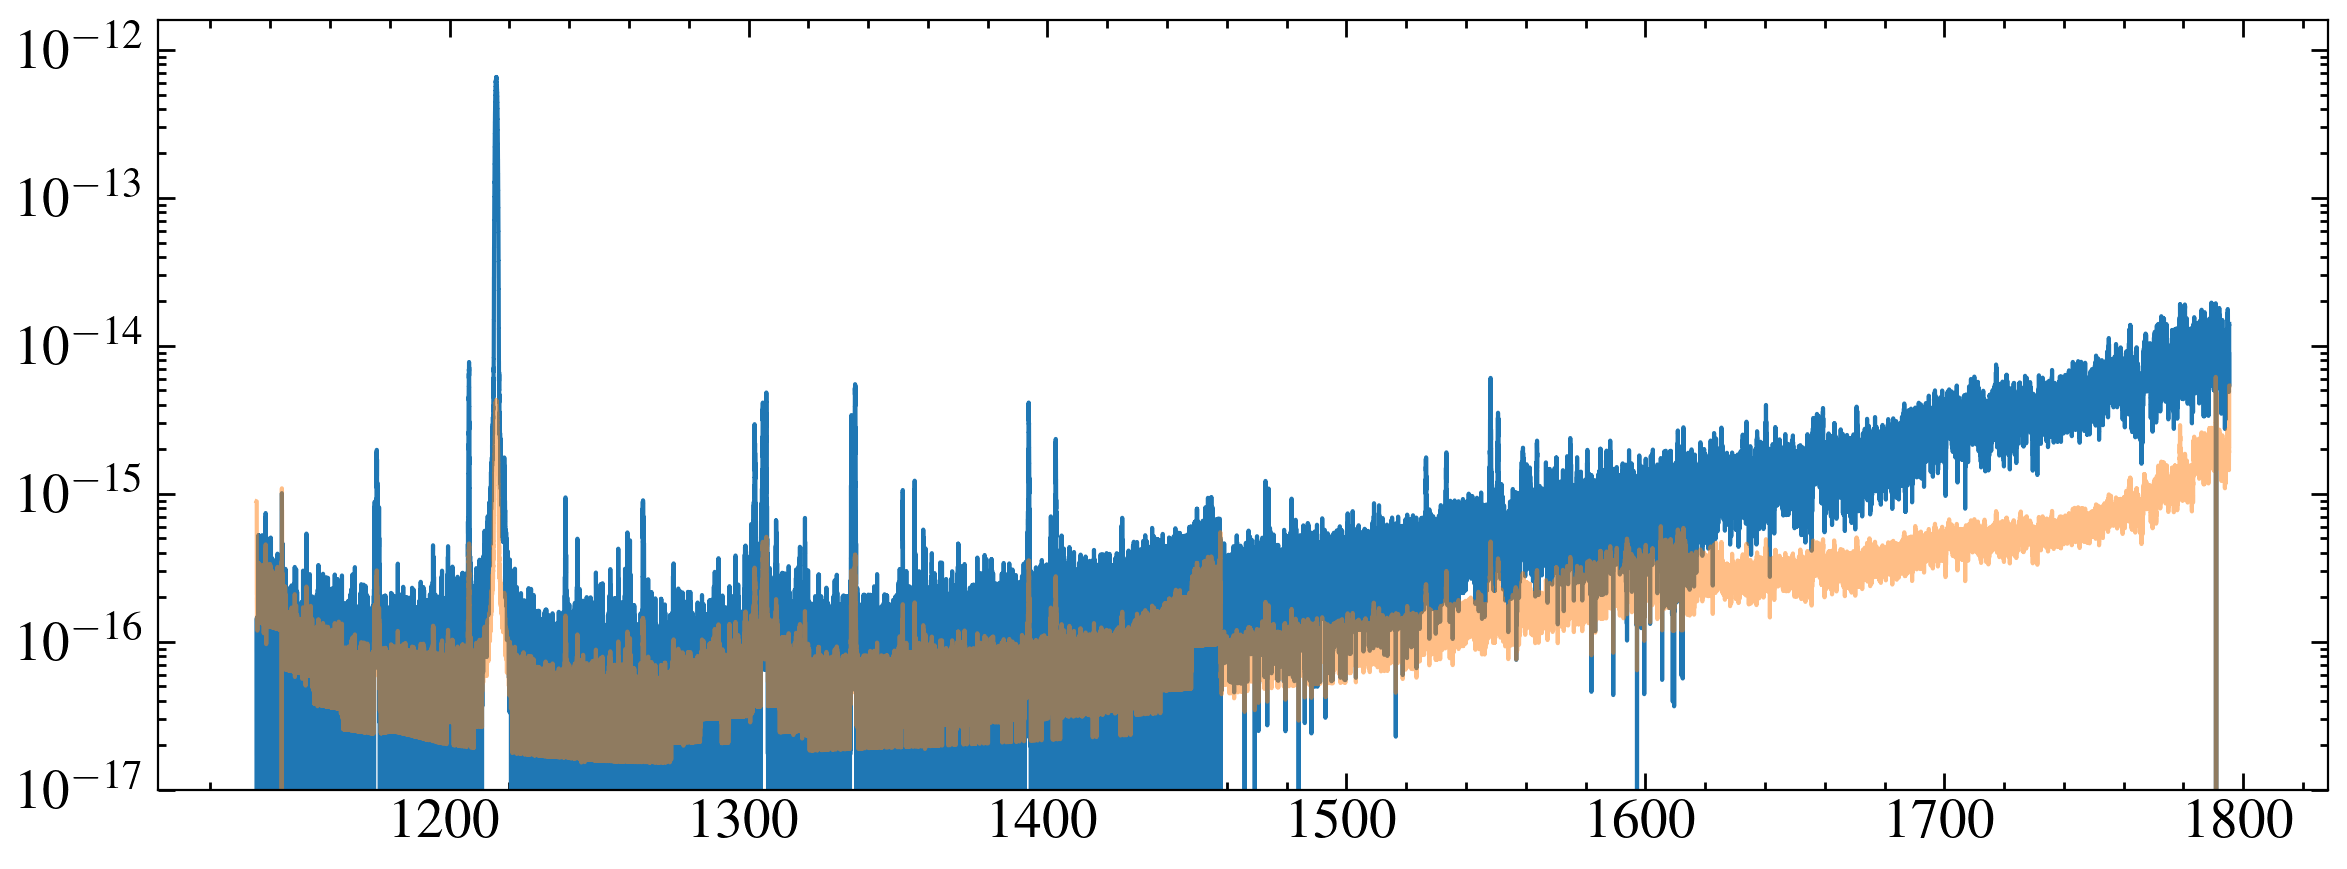

WASP-107
WASP-39


In [3]:
for star in stars:
    print(star)
    hasp = glob.glob('{}{}/*cspec.fits'.format(path, star))
    # print(hasp)
    if len(hasp) > 0:
        hasp_top = []
        levels = []
        for spec in hasp:
            level = fits.getheader(spec, 0)['HLSP_LVL']
            levels.append(level)
            # if level >=3:
                # hasp_top.append(spec)
        # print(levels)
        top_args = np.flatnonzero(levels == np.max(levels))
        # print(top_args)
        for arg in top_args:
            hasp_top.append(hasp[arg])
        print(hasp_top)

        fig, ax = plt.subplots()
        for spec in hasp_top:
            data = fits.getdata(spec, 1)[0]
            ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
            ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
        ax.set_yscale('log')
        ax.set_ylim(1e-17)
        plt.show()
            



Not great coverage from HASP. What about x1ds? What do we have?

GJ_3470


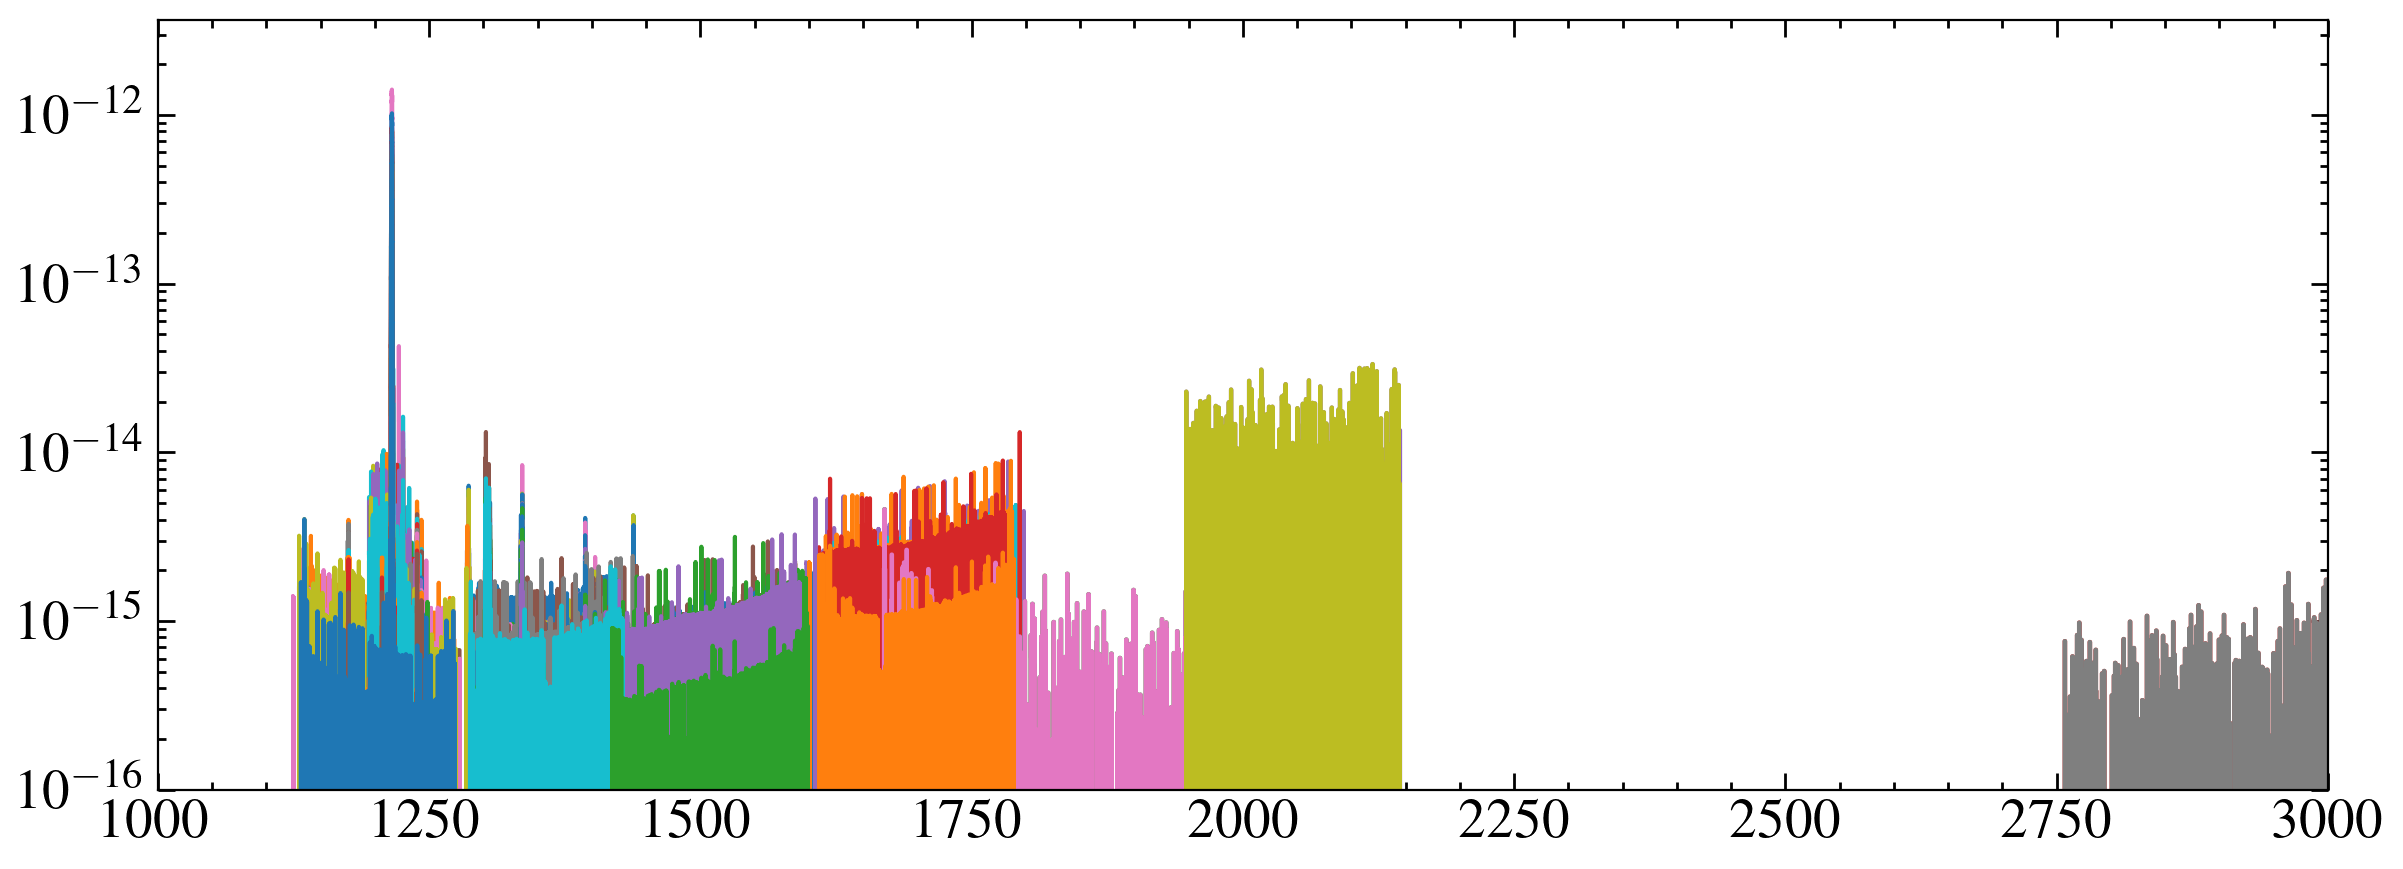

HD189733


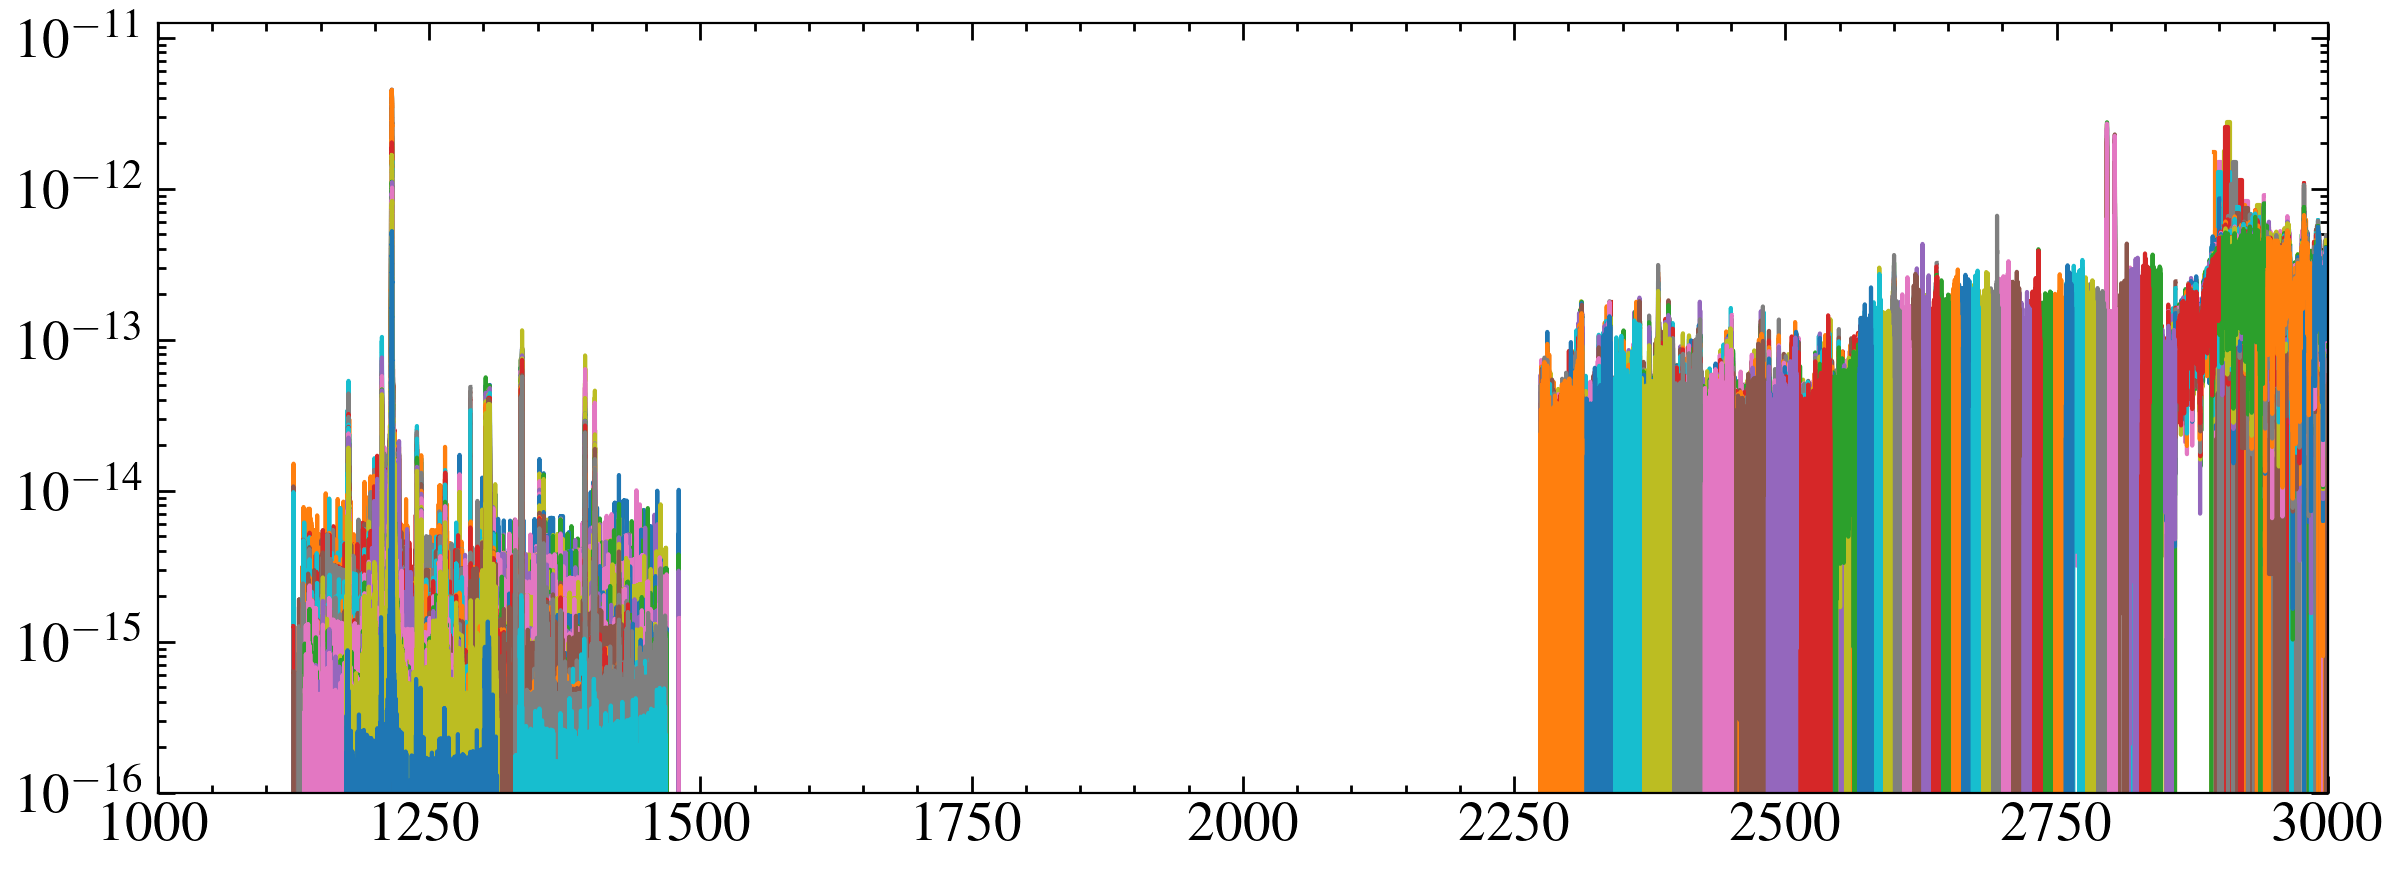

HD209458


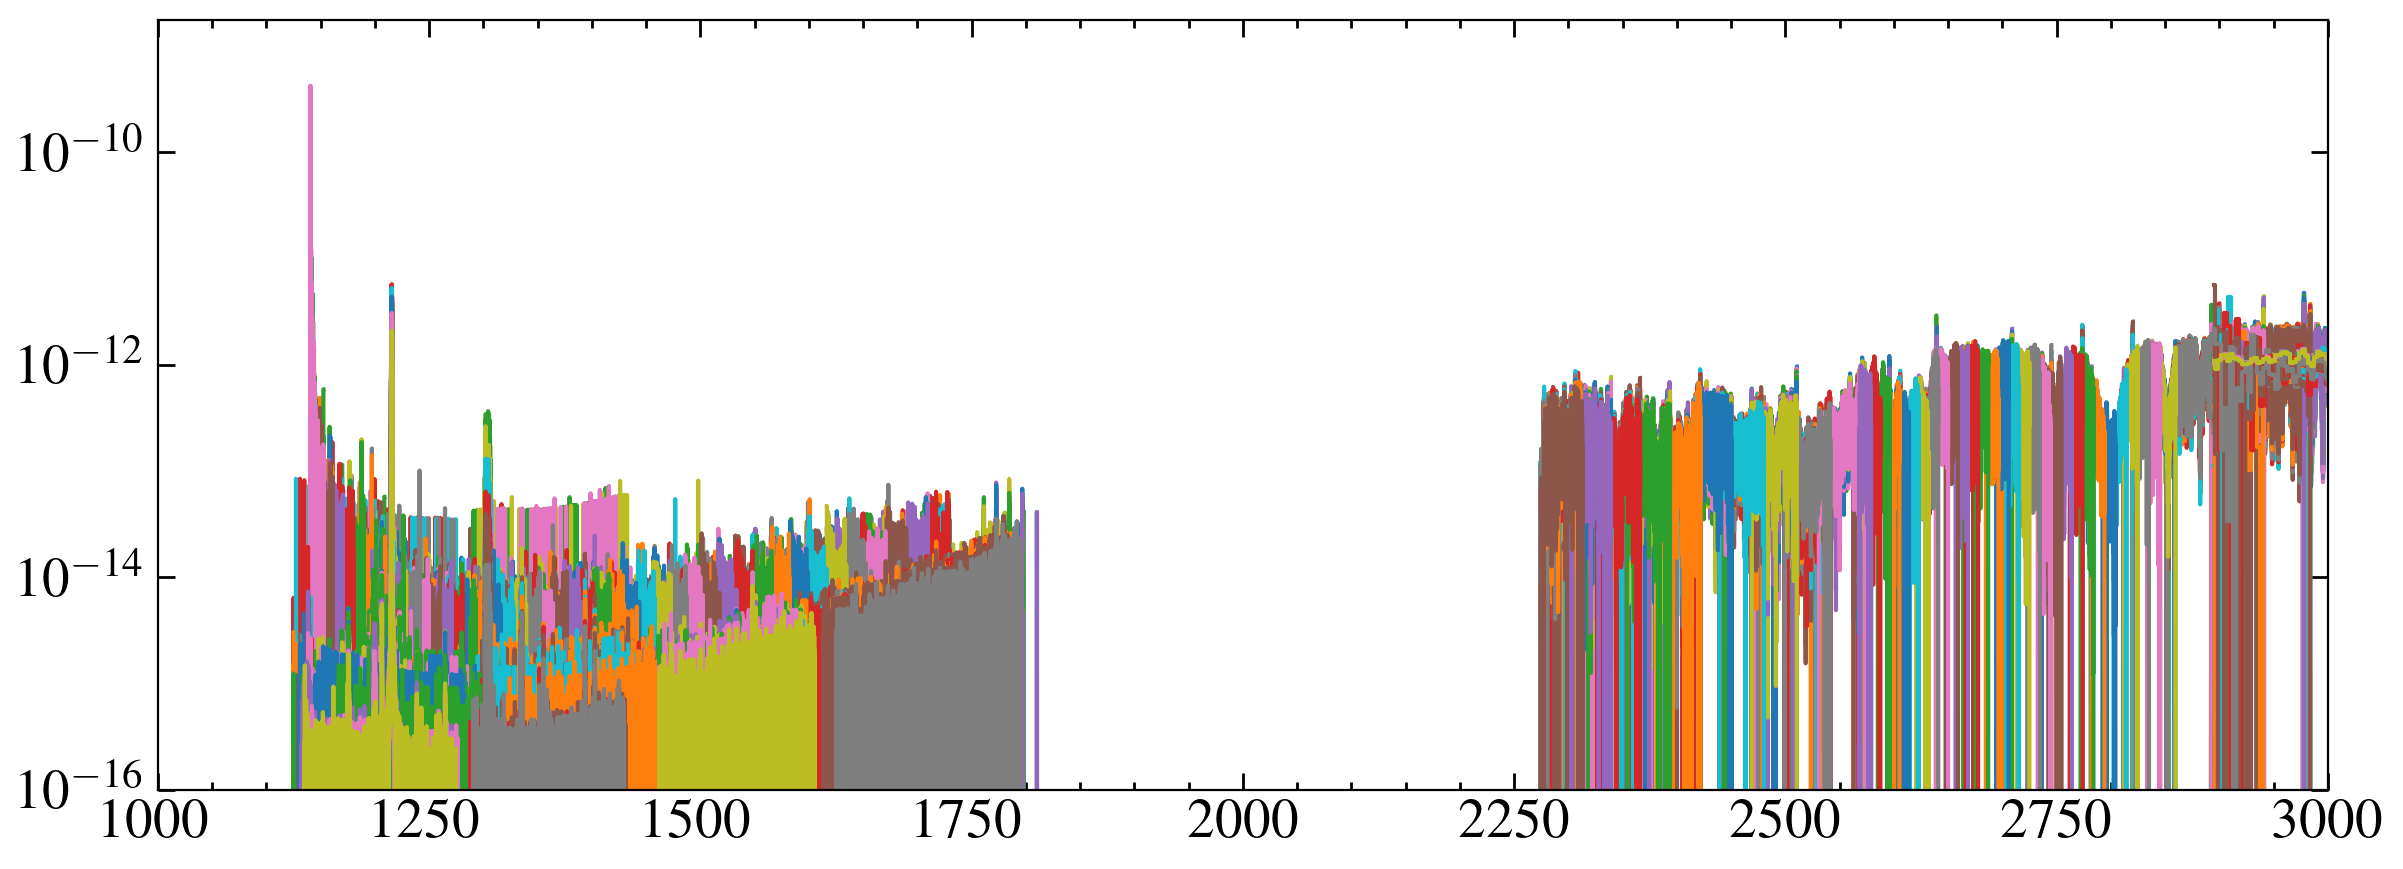

WASP-107


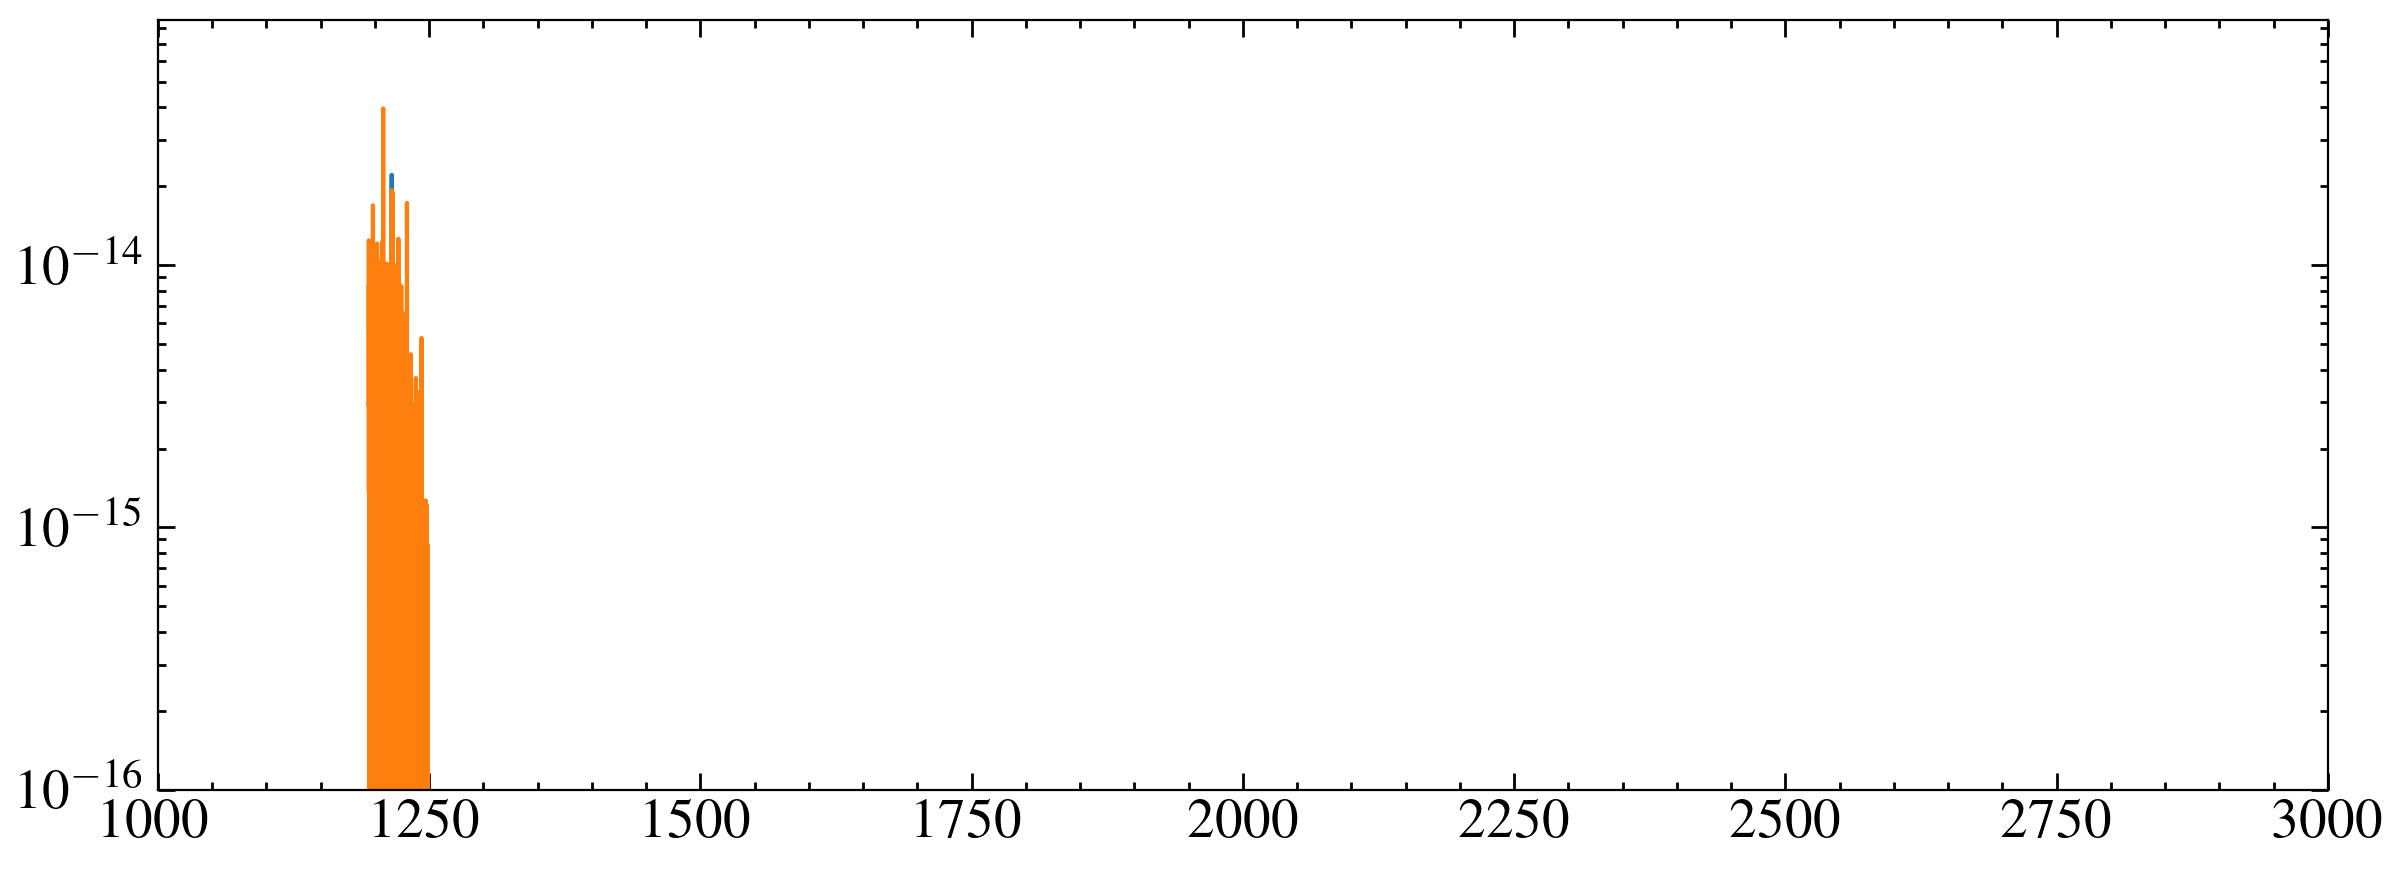

WASP-39


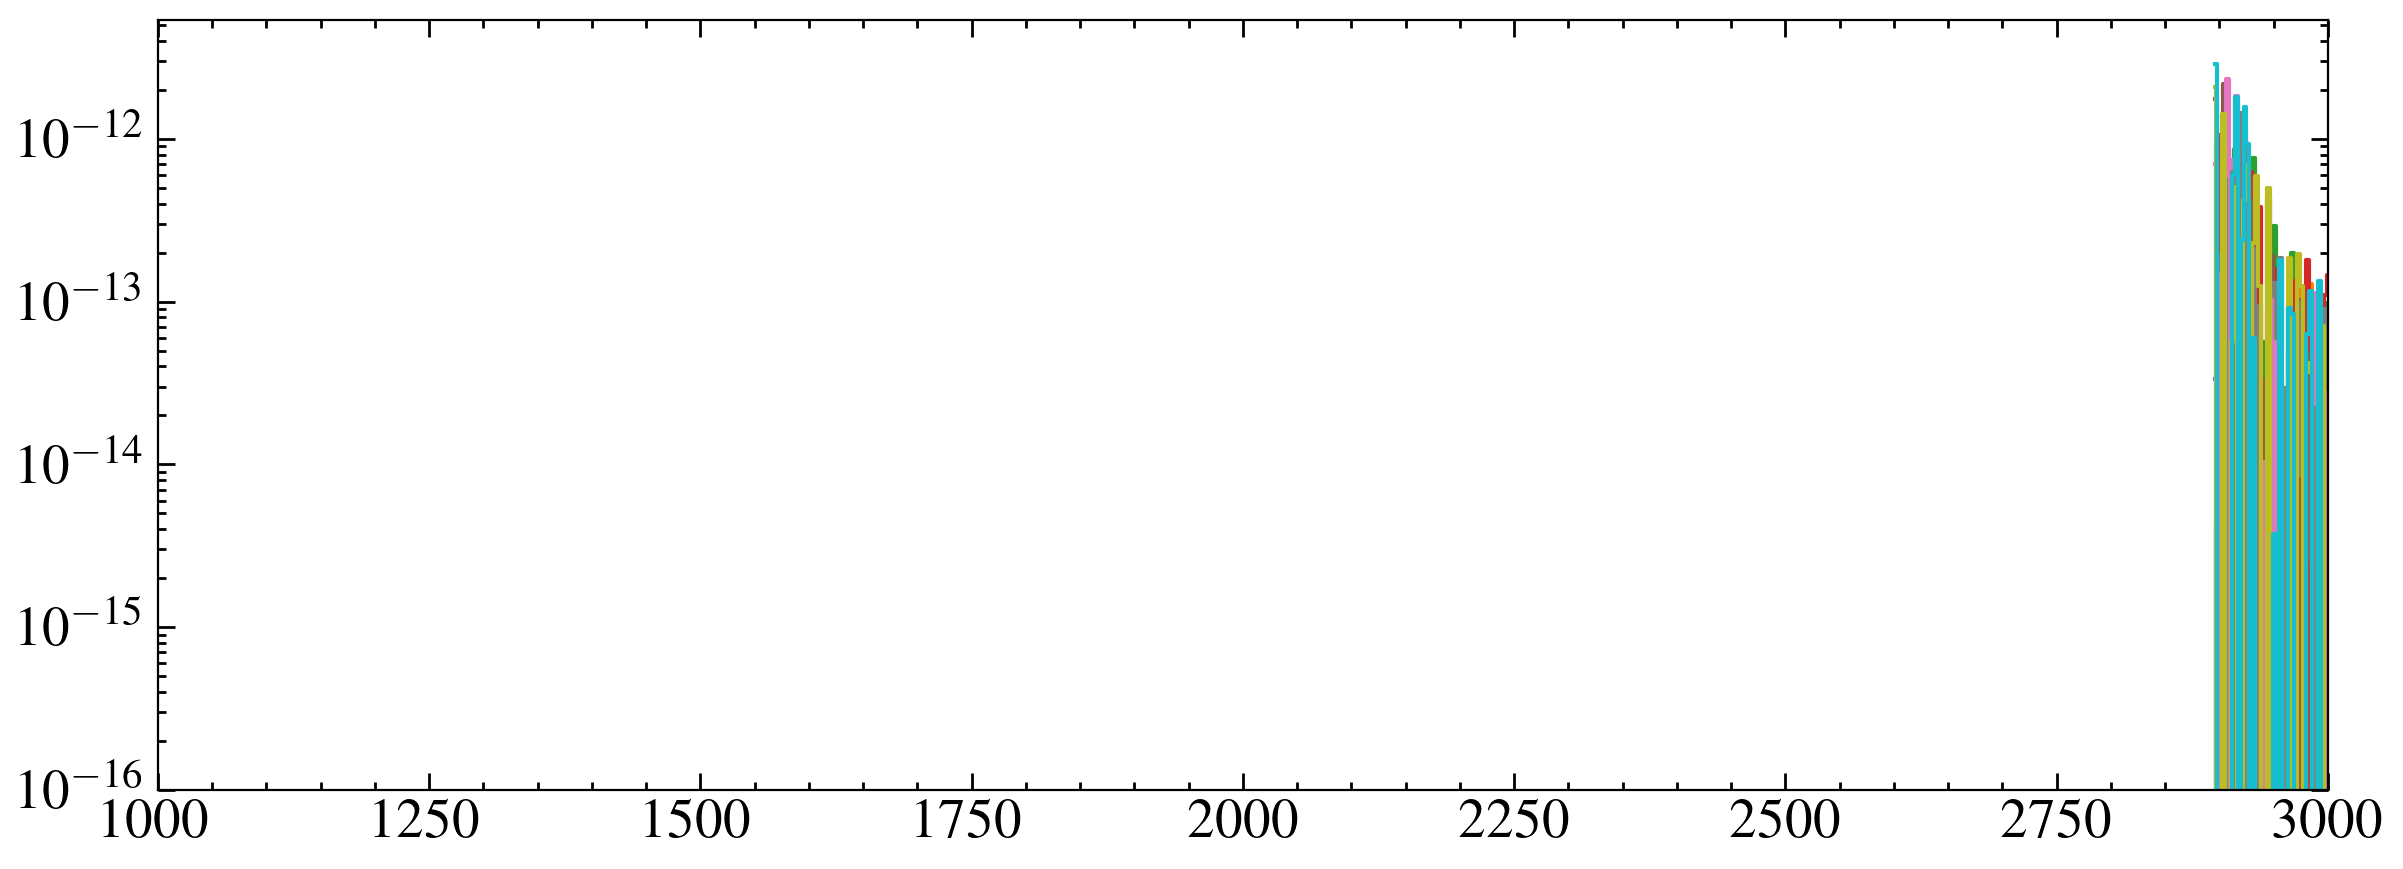

In [4]:
for star in stars:
    print(star)
    x1ds = np.hstack((glob.glob('{}{}/*x1d.fits'.format(path, star)), glob.glob('{}{}/*x1dsum.fits'.format(path, star))))
    # print(x1ds)
    fig, ax = plt.subplots()
    for x in x1ds:
        dt = fits.getdata(x, 1)
        for data in dt:
                ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
            # ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
    ax.set_yscale('log')
    ax.set_ylim(1e-16)
    ax.set_xlim(1000, 3000)
    plt.show()

GJ_3470
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/GJ_3470/hst_14843_cos_gj-3470_g130m-g160m-cg230l_ldcu_cspec.fits']


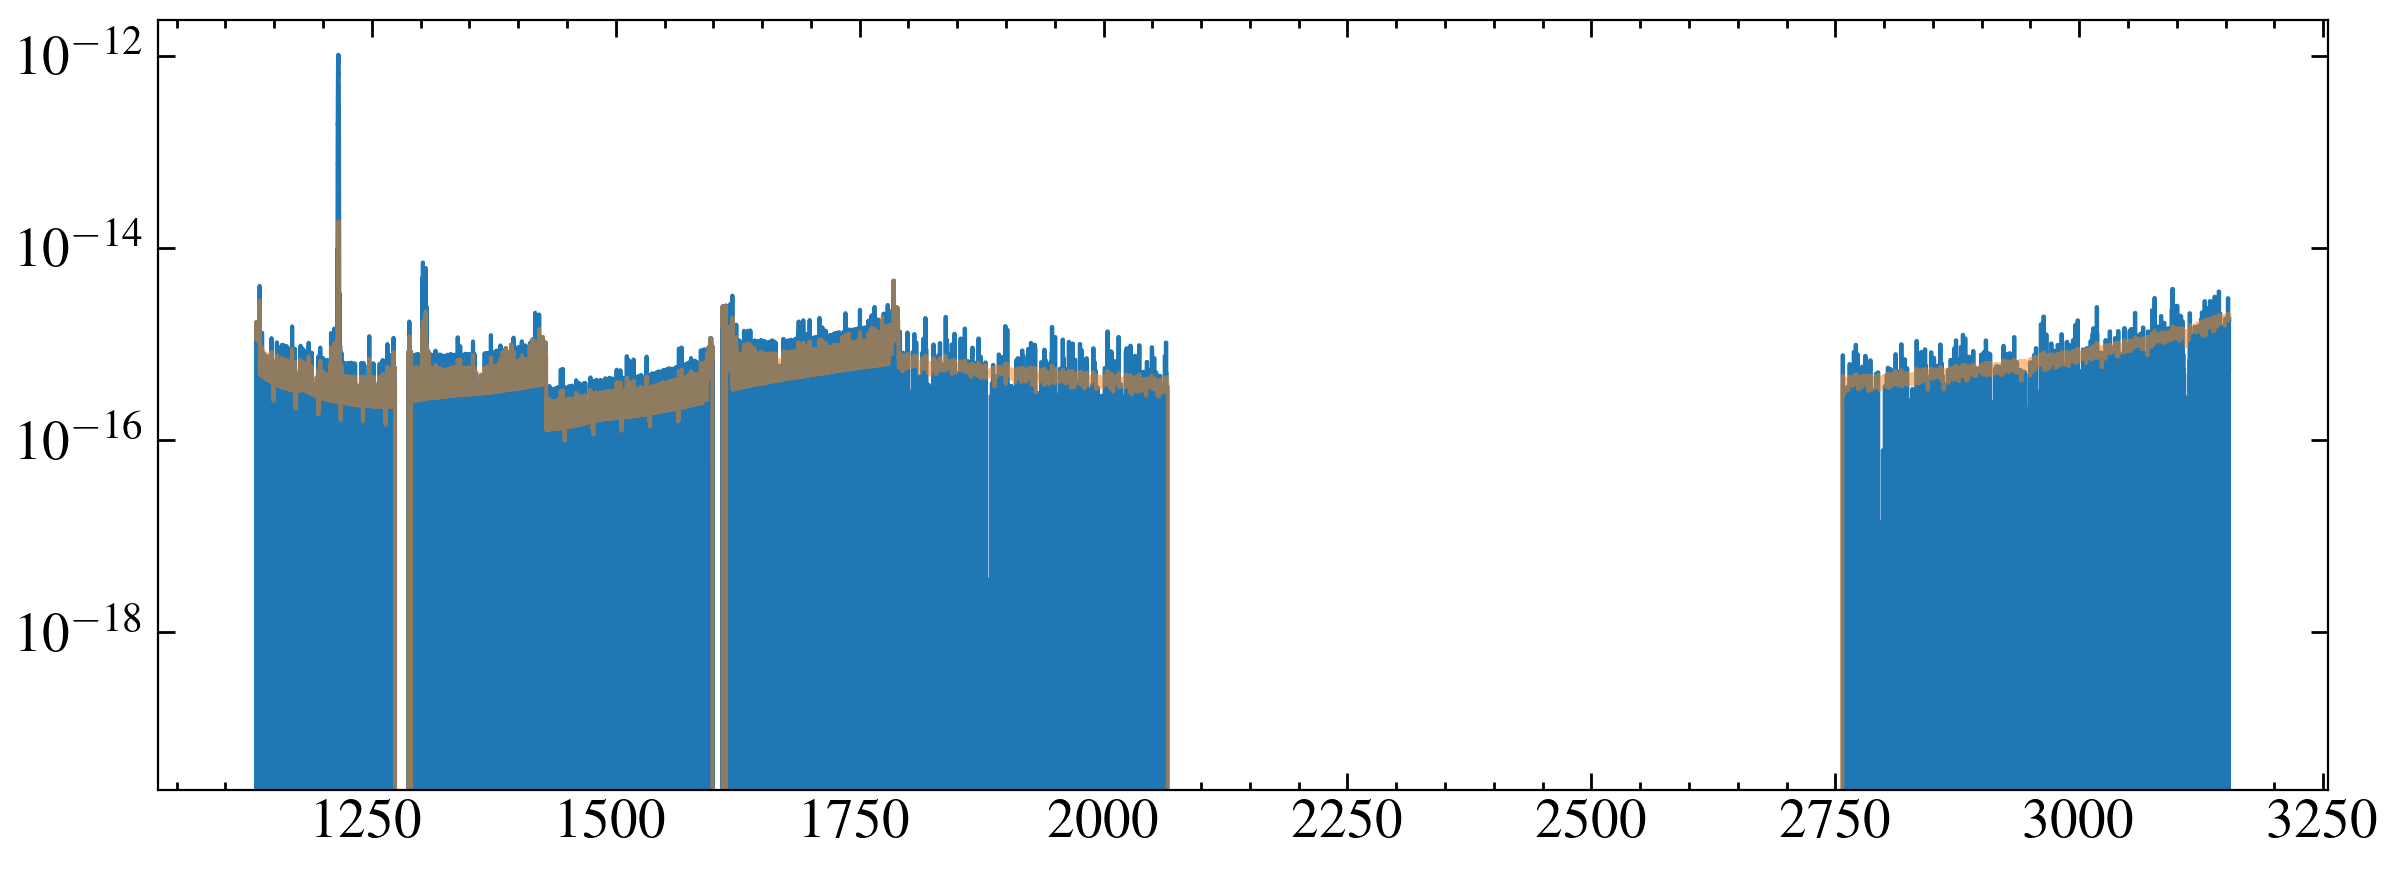

In [5]:
for star in stars[0:1]:
    print(star)
    hasp = glob.glob('{}{}/*cspec.fits'.format(path, star))
    # print(hasp)
    if len(hasp) > 0:
        hasp_top = []
        levels = []
        for spec in hasp:
            level = fits.getheader(spec, 0)['HLSP_LVL']
            levels.append(level)
            # if level >=3:
                # hasp_top.append(spec)
        # print(levels)
        top_args = np.flatnonzero(levels == np.max(levels))
        # print(top_args)
        for arg in top_args:
            hasp_top.append(hasp[arg])
        print(hasp_top)

        fig, ax = plt.subplots()
        for spec in hasp_top:
            data = fits.getdata(spec, 1)[0]
            ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
            ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
        ax.set_yscale('log')
        # ax.set_ylim(-1e-16, 1e-15)
        # ax.set_xlim(2750, 2850)
        plt.show()
            



GJ_3470
od9m04010
od9m04020
od9m04030
od9m04040
od9m04050
od9m05010
od9m05020
od9m05030
od9m05040
od9m05050
od9m06010
od9m06020
od9m06030
od9m06040
od9m06050


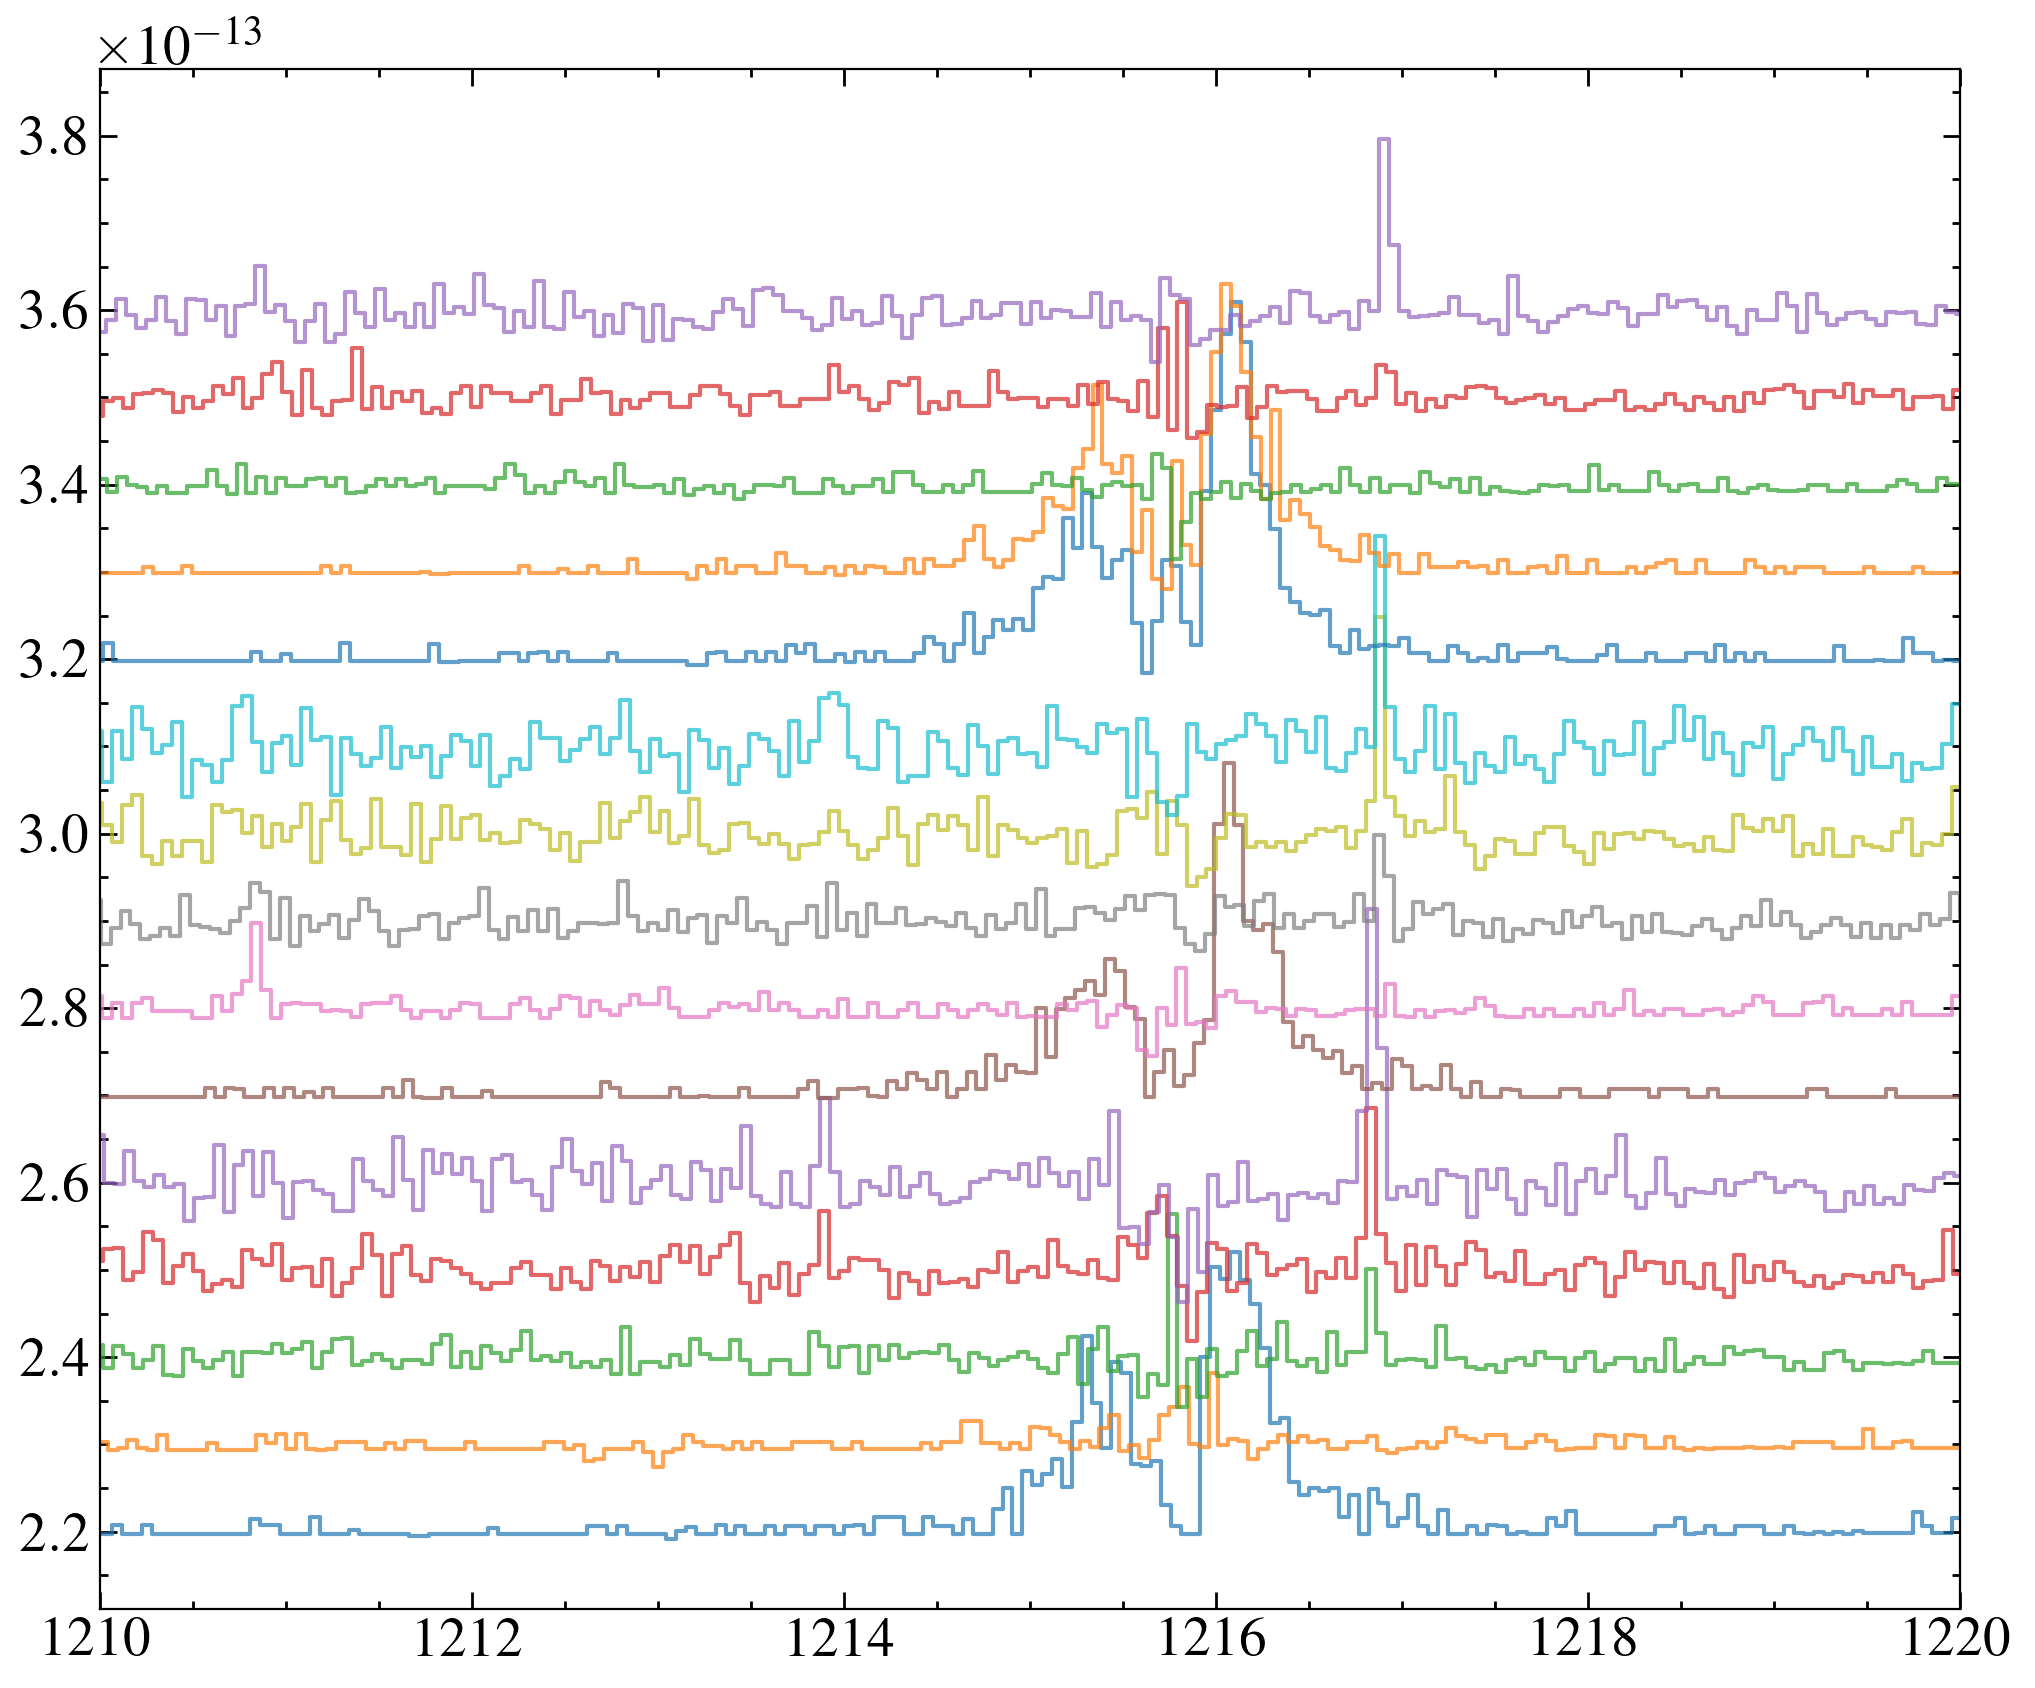

In [6]:
for star in stars[0:1]:
    print(star)
    x1ds = glob.glob('{}{}/*x1d.fits'.format(path, star))
    # print(x1ds)
    fig, ax = plt.subplots(figsize=(12, 10))
    for i, x in enumerate(x1ds):
        grating = fits.getheader(x, 0)['OPT_ELEM']
        if grating == 'G140M':
            print(fits.getheader(x, 0)['ROOTNAME'])
            dt = fits.getdata(x, 1)
            for data in dt:
                    ax.step(data['WAVELENGTH'], data['FLUX']+i*1e-14, where='mid', alpha=0.7)
                # ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
    # ax.set_yscale('log')
    # ax.set_ylim(1e-16)
    ax.set_xlim(1210, 1220)
    plt.show()

Rextractions and get a lya reconstruction running.

In [7]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


odzb01010
odzb02010
reextractions/wasp-107/odzb02010_new_x1d.fits
189.75682
reextractions/wasp-107/odzb01010_new_x1d.fits
192.70059


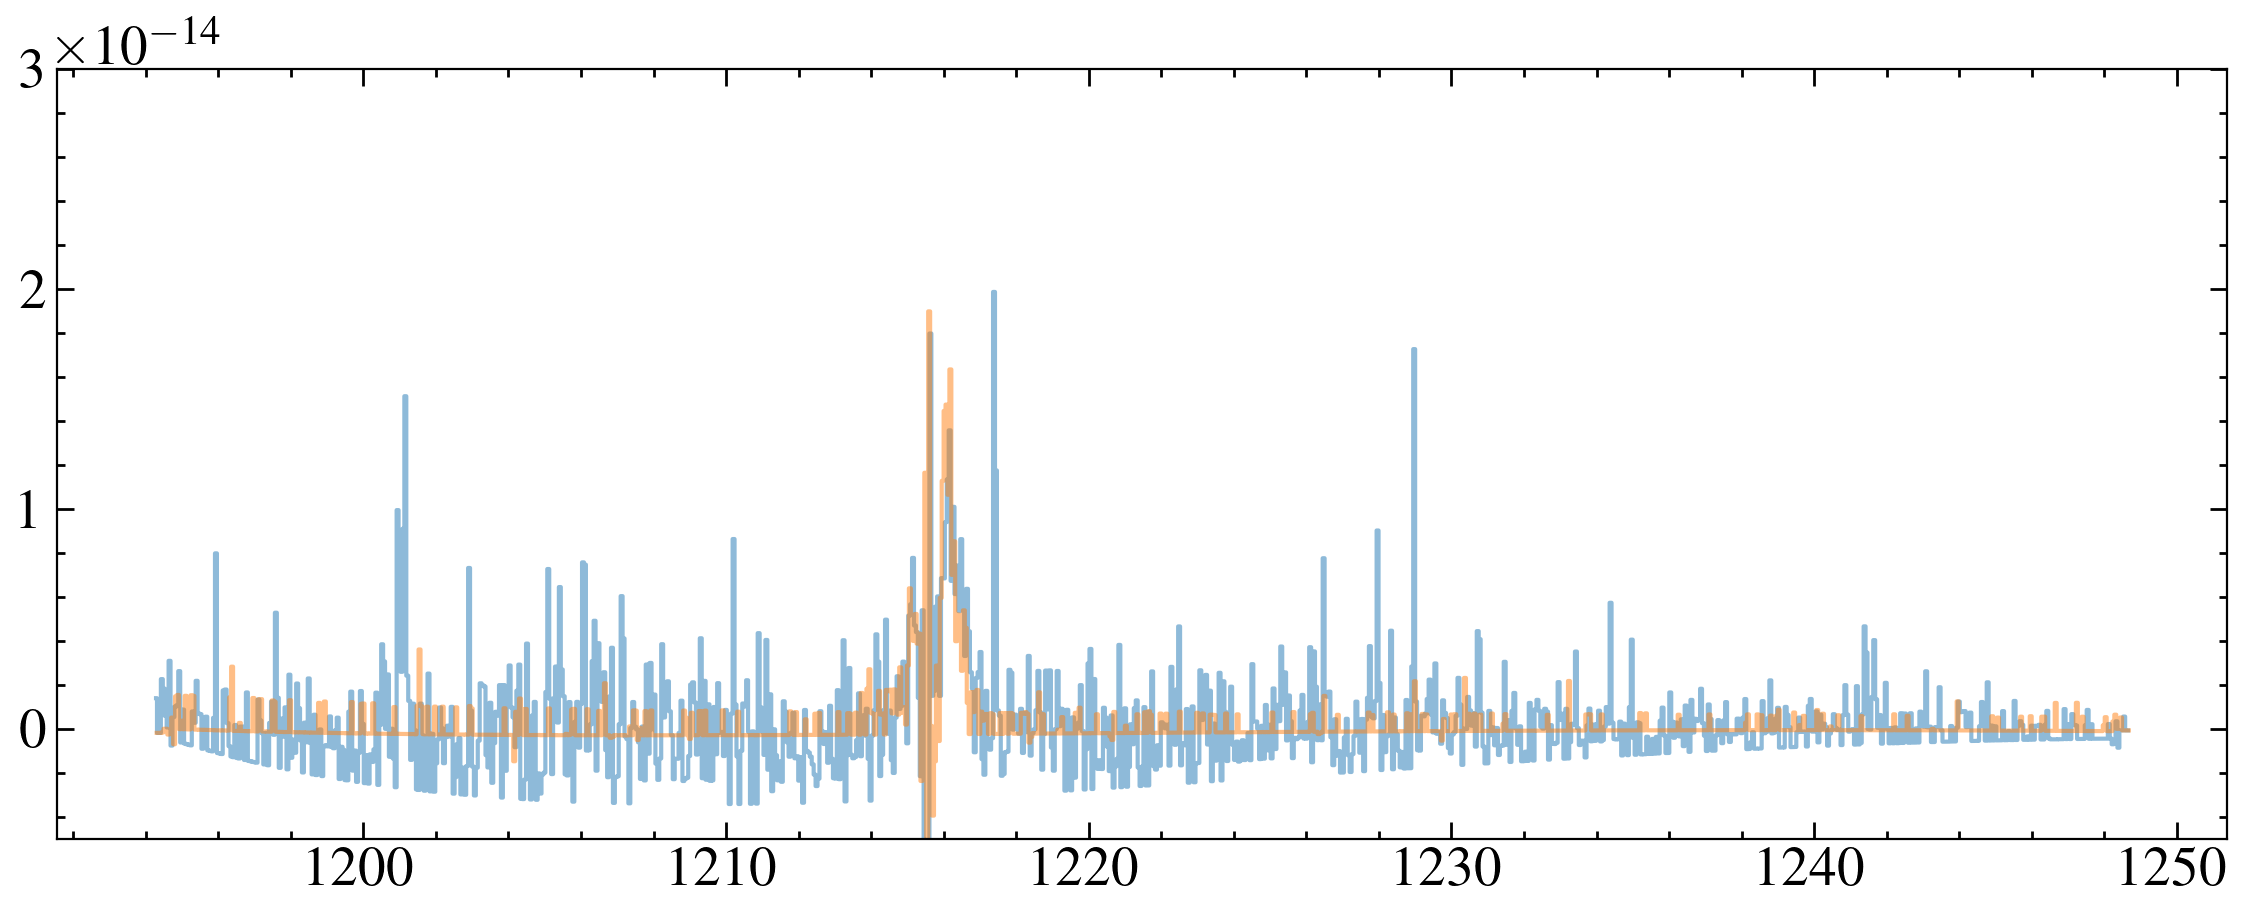

In [8]:
#WASP 107
starpath = '{}WASP-107/'.format(path)
roots = ['odzb01010',  'odzb02010']
os.environ['oref'] = starpath
xs = [412, 412]
ys = [191, 192]

for i, root in  enumerate(roots):
    flt = '{}/{}_flt.fits'.format(starpath, root)
    # SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    # grating = fits.getheader(flt,0)['OPT_ELEM']
    # cenwave = fits.getheader(flt,0)['CENWAVE']
    # tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/wasp-107/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
    # a2center = get_a2center(xs[i],ys[i], tracegrid)
    print(root)
    # print(a2center)
    a2center = ys[i]
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/wasp-107/{}_new.trl'.format(rootname), a2center=a2center,
                      maxsrch=10, bk1offst=-30, bk2offst=30,
                      bk1size=5, bk2size=5)
    # print(fits.getdata('reextractions/gj4102/{}_new_x1d.fits'.format(rootname),1)['A2CENTER'])
    
new_x1ds = glob.glob('reextractions/wasp-107/*new_x1d.fits')
for x in new_x1ds:
    print(x)
    # grating = fits.getheader(x, 0)['OPT_ELEM'] 
    # print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160) #& (w < 1210) | (w > 1220)

    
    w, f, e = w[mask], f[mask], e[mask]

    plt.step(w, f, where='mid', alpha=0.5)
    # plt.step(w, e, where='mid')
    plt.ylim(-0.5e-14,3e-14 )
    # plt.show()


(1212.0, 1220.0)

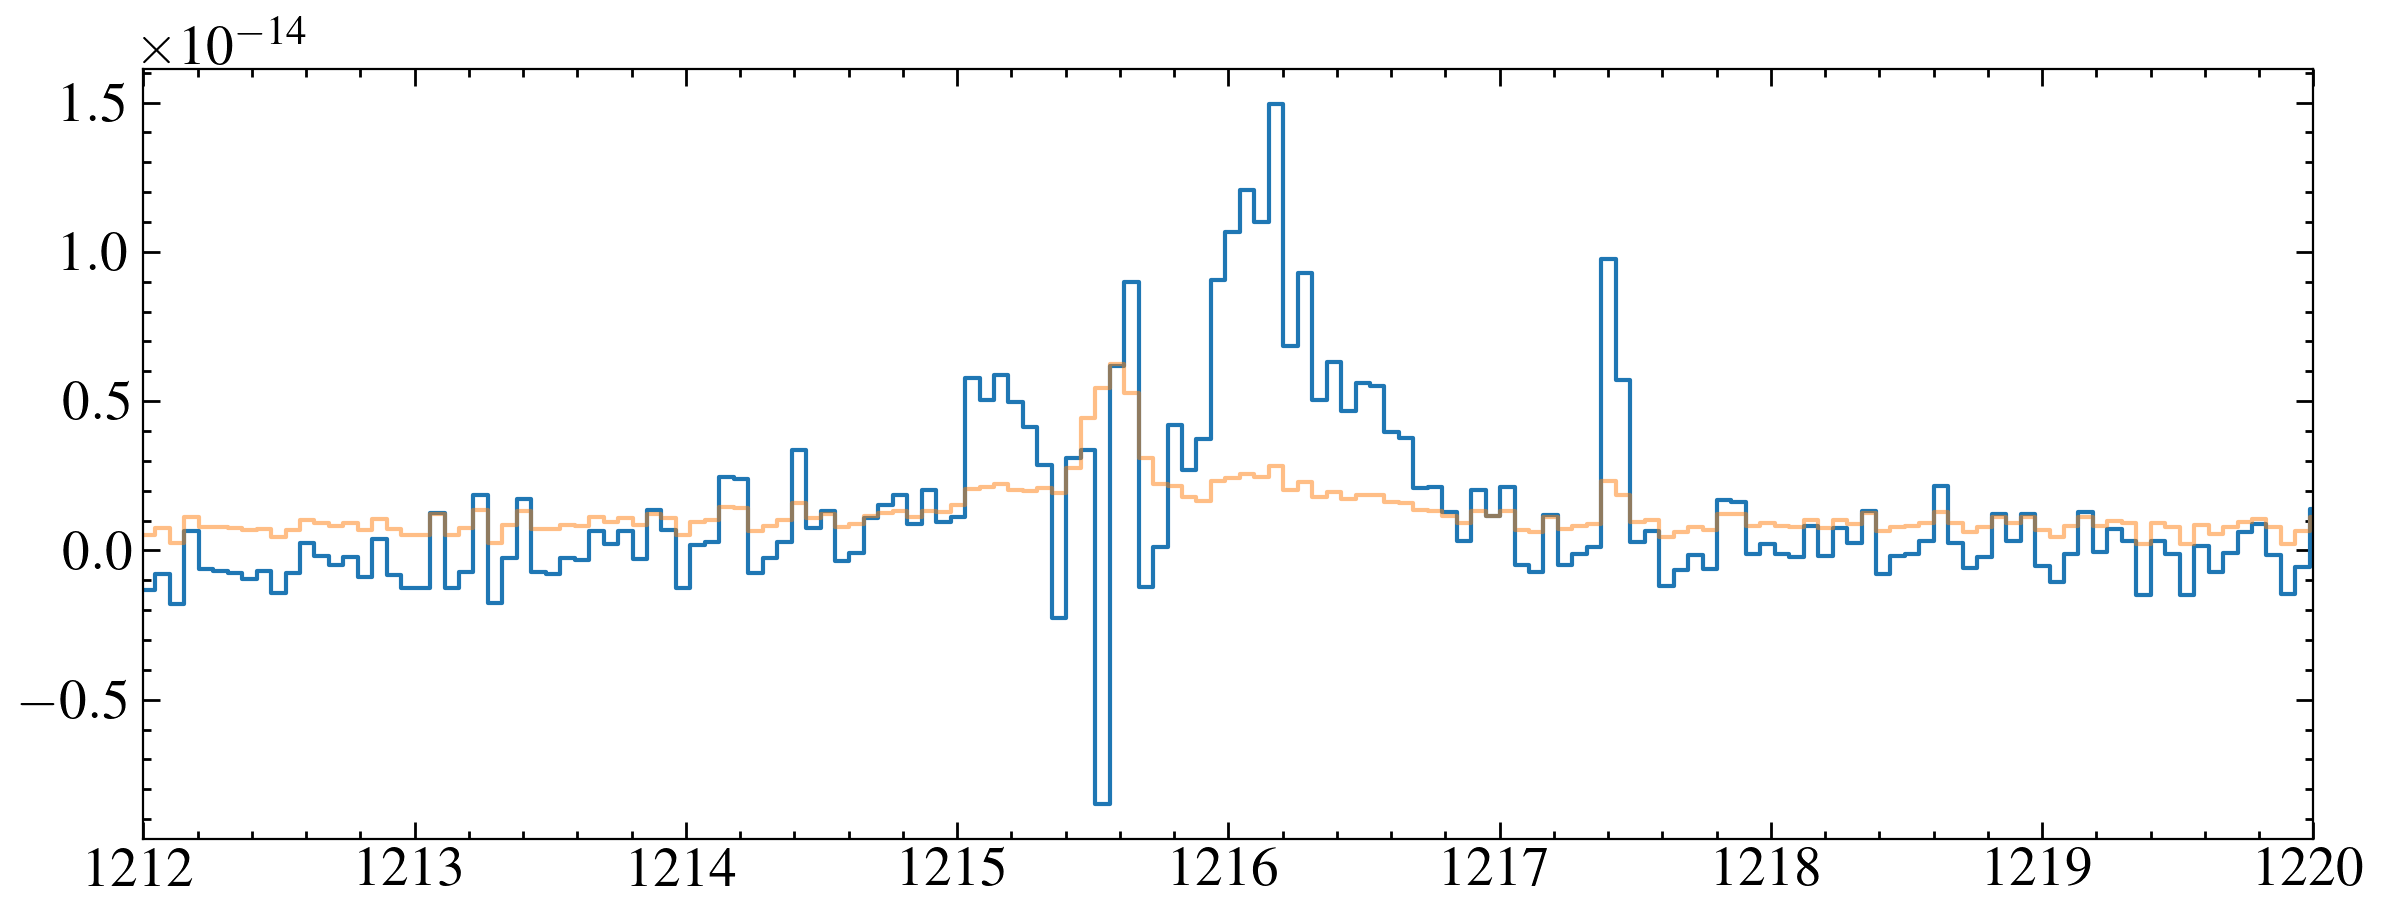

In [11]:
#hasp coadd
fig, ax = plt.subplots()

data = fits.getdata('reextractions/wasp-107/hasp_output/hst_15694_stis_wasp-107_g140m_odzb_cspec.fits', 1)[0]
w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']

ax.step(w, f, where='mid')
ax.step(w, e, where='mid', alpha=0.5)

ax.set_xlim(1212, 1220)

lya_model unconvolved_fluxes
----------------------------
        7.86784002822614e-15
       8.508675309986817e-15
       9.191504294276665e-15
       9.882677295007667e-15
      1.0561718041762738e-14
   h1_col value   
------------------
17.808657882896767
18.080330646492122
 18.30851170866963
18.515129550781932
18.697624700410884
                --
                --
               ...
                --
                --
                --
                --
                --
                --
                --
Length = 85 rows


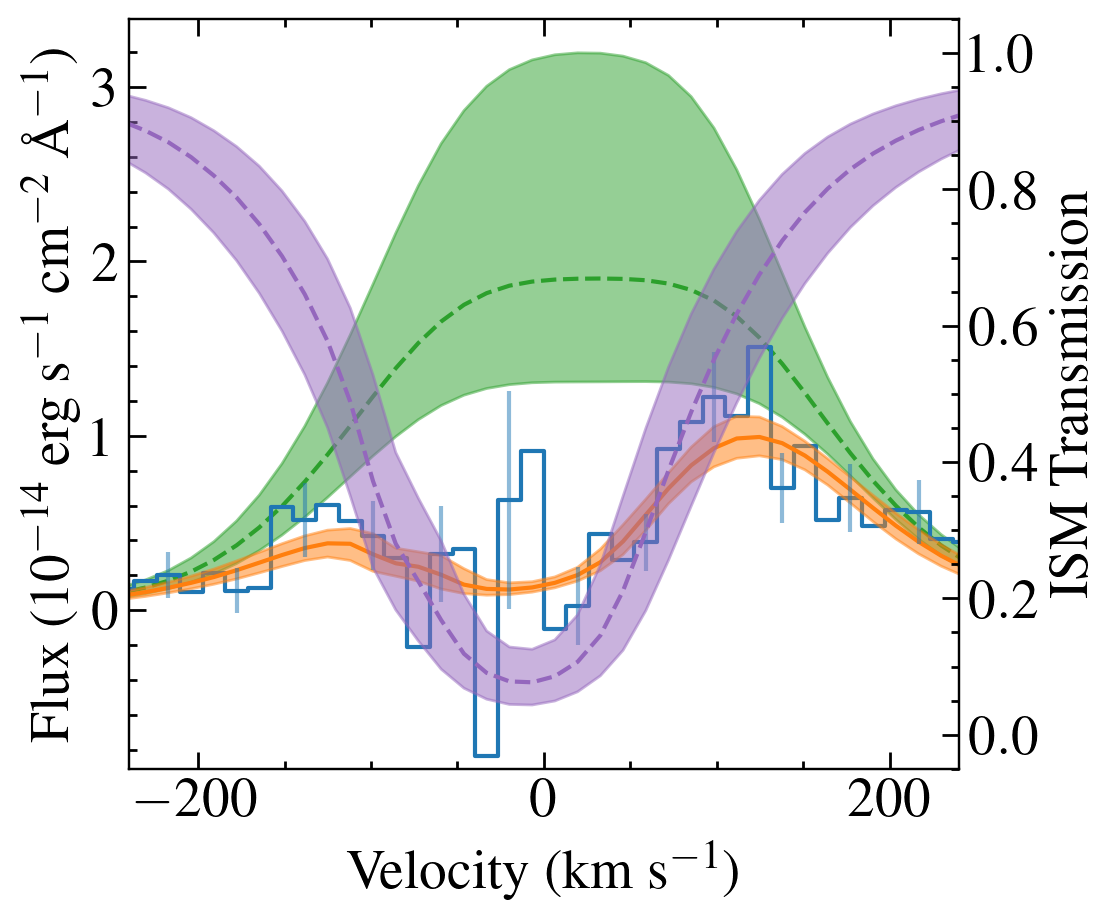

In [10]:
lyapath = 'lya/wasp-107/wasp-107_SR_MCMC_results.csv'
data = Table.read(lyapath)
lya_flux =  data['lya_model unconvolved_fluxes'][0:5]
print(lya_flux)
print(data['h1_col value'])
lya = 1215.67
# ism_scale = 2.3e-14 #scaling ism to plot
fscale = 1e14 #scaling flux to axis
# ism_scale *= fscale

fig, ax= plt.subplots(figsize=(6,5))
v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
ax.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
ax.plot(v, data['lya_model_median']*fscale, c='C1', label='Model fit', zorder=1)
ax.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)

ax.plot(v, data['lya_intrinsic_median']*fscale, c='C2', ls='--', label=r'Intrinsic Ly$\alpha$ profile', zorder=-1)
ax.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color='C2', alpha=0.5, zorder=-10)

# name = os.path.split(spec)[1][:-34]
# ax.set_title(name, size=20)

# xlim = min([abs(min(v.value)), max(v.value)])-10
xlim = 240
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-0.91, 3.39)
ax2=ax.twinx()
ax2.plot(v, data['lya_ism_median'], c='C4', ls='--', alpha=1, label='ISM profile', zorder=-9)
ax2.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
ax2.set_ylim(-0.05, 1.05)
ax2.set_ylabel('ISM Transmission')


ax.set_xlabel('Velocity (km s$^{-1}$)', size=20)
ax.set_ylabel('Flux (10$^{-14}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)

fig.tight_layout()

# fig.savefig('plots/hd86226_lya.pdf')

Nice. Can use to check a proxy

HD189733
1 COS
1 COS
3 COS
hst_11673_cos_hd-189733_g130m_lb5k_cspec.fits
1 STIS
1 STIS
3 STIS
hst_11673_stis_hd-189733_g140m_ob5k_cspec.fits
1 STIS
1 STIS
1 STIS
3 STIS
hst_12920_stis_hd-189733_g140m_oc1f_cspec.fits
1 COS
1 COS
1 COS
3 COS
hst_14767_cos_hd-189733_g130m_ld9m_cspec.fits
1 STIS
1 STIS
1 STIS
3 STIS
hst_15338_stis_hd-189733_e230m_odfv_cspec.fits
1 COS
1 COS
1 COS
3 COS
hst_15710_cos_hd-189733_g130m_ldzk_cspec.fits
1 STIS
1 STIS
1 STIS
1 STIS
1 STIS
3 STIS
hst_17157_stis_hd-189733_g140m_oewb_cspec.fits
3 COS
hst_12984_cos_hd-189733_g130m_lc0u_cspec.fits
3 STIS
hst_16225_stis_hd189733_e230h_oee5_cspec.fits


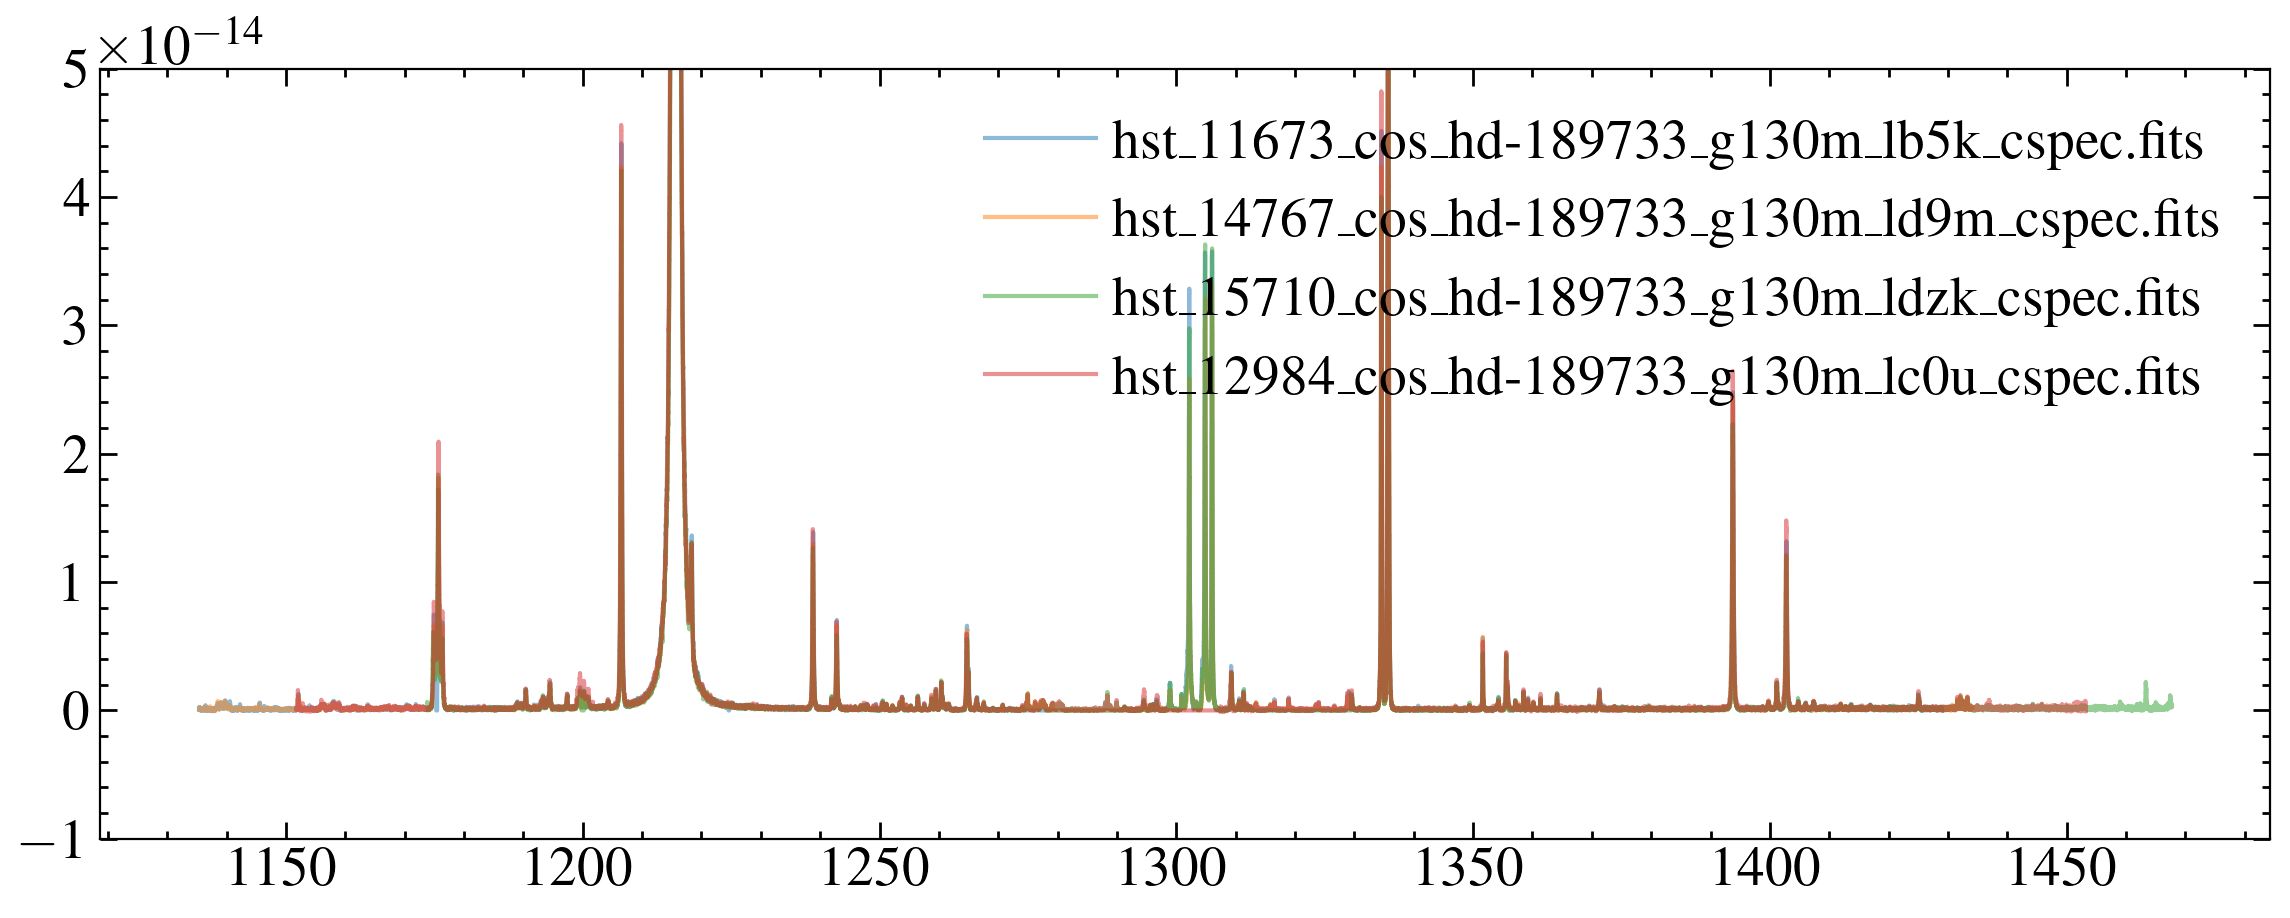

HD209458
1 STIS
1 STIS
1 STIS
1 STIS
3 STIS
hst_10081_stis_hd209458_sg140l_o8u6_cspec.fits
4 COS
hst_11534_cos_hd-209458_g130m-g160m_lb4m_cspec.fits
1 COS
1 COS
1 COS
1 COS
3 COS
hst_11534_cos_hd-209458_g130m_lb4m_cspec.fits
1 COS
1 COS
1 COS
3 COS
hst_11534_cos_hd-209458_g160m_lb4m_cspec.fits
1 STIS
1 STIS
1 STIS
1 STIS
3 STIS
hst_11576_stis_hd-209458_e230m_ob6j_cspec.fits
1 STIS
3 STIS
hst_13332_stis_hd209458_e230h_ocd8_cspec.fits
1 COS
1 COS
3 COS
hst_14090_cos_hd-209458_g130m_lcyz_cspec.fits
1 STIS
1 STIS
1 STIS
3 STIS
hst_17094_stis_hd-209458b_g140m_of0x_cspec.fits
1 STIS
1 STIS
3 STIS
hst_9064_stis_hd209458_e140m_o6e2_cspec.fits
1 STIS
1 STIS
1 STIS
1 COS
1 COS
3 STIS
hst_9064_stis_hd209458_g140m_o6e2_cspec.fits


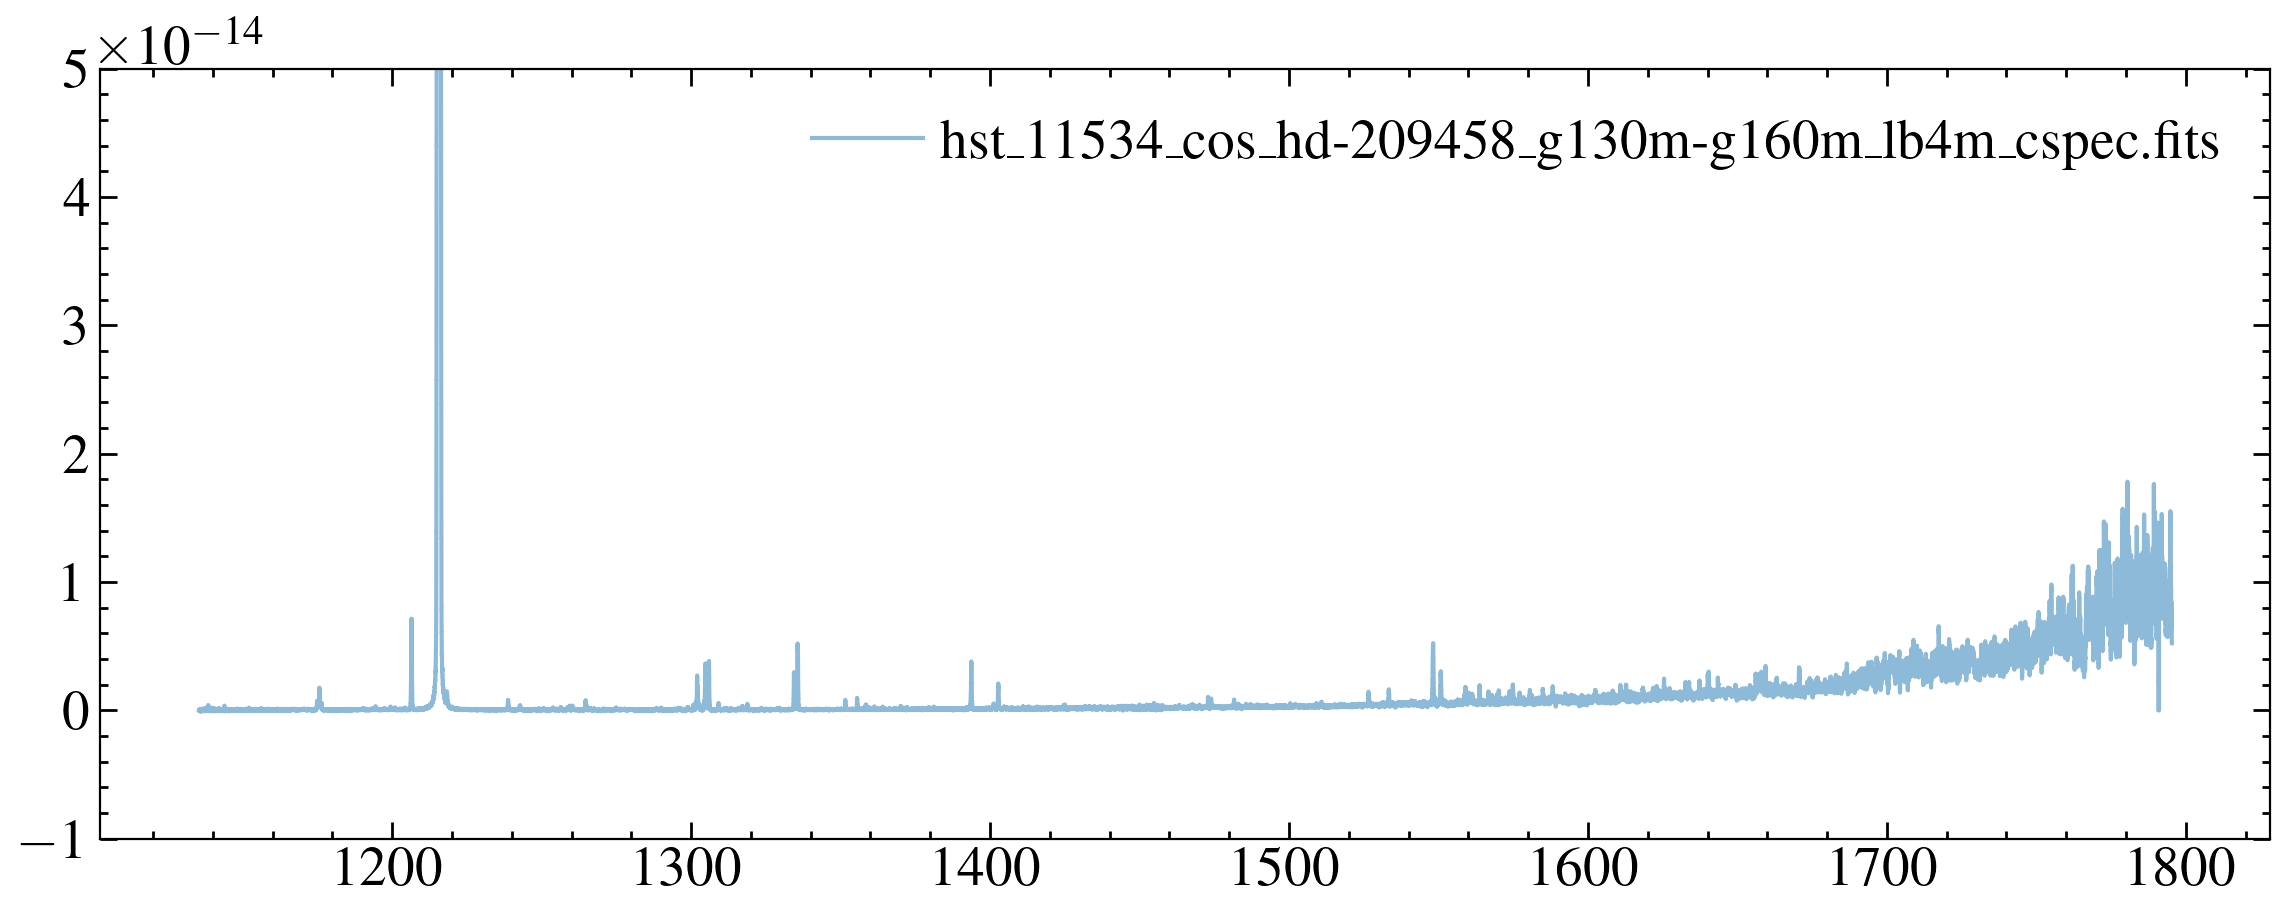

In [11]:
for star in stars[1:3]:
    print(star)
    hasp = glob.glob('{}{}/*cspec.fits'.format(path, star))
    # print(hasp)
    if len(hasp) > 0:
        hasp_top = []
        levels = []
        for spec in hasp:
            level = fits.getheader(spec, 0)['HLSP_LVL']
            inst = fits.getheader(spec, 0)['INSTRUME']
            
            levels.append(level)
            print(level, inst)
            if level >=3:
                print(os.path.split(spec)[1])
                # hasp_top.append(spec)
        # print(levels)
        top_args = np.flatnonzero(levels == np.max(levels))
        # print(top_args)
        for arg in top_args:
            hasp_top.append(hasp[arg])
        # print(hasp_top)

        fig, ax = plt.subplots()
        for spec in hasp_top:
            if fits.getheader(spec, 0)['INSTRUME'] == 'COS':
                data = fits.getdata(spec, 1)[0]
                f =data['FLUX']
                f = convolve(f, Box1DKernel(5))
                ax.step(data['WAVELENGTH'], f, where='mid', alpha=0.5, label= os.path.split(spec)[1])
                # ax.step(data['WAVELENGTH'], data['FLUX'], where='mid', alpha=0.5, label= os.path.split(spec)[1])
                # ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
        # ax.set_yscale('log')   
        ax.legend()
        ax.set_ylim(-1e-14, 5e-14)
    
        # ax.set_ylim(1e-16)
        # ax.set_xlim(2750, 2850)
        plt.show()
            



HD189733


In [23]:
import prepare_phoenix_svo as pp
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)

mass = 0.83
teff = 5013
teff_e = 68
radius = 0.78
distance = 19.76
save_path = 'models/'
star = 'hd-189733'
g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = np.log10(g.value)
# print(np.log10(g.value))
# g = 4.623
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2
pdata = Table.read('models/hd-189733_phoenix_interpolated.ecsv')
pw, pf, pe =  pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR'] 

1151.733 1453.2012
2277.8252 3072.664


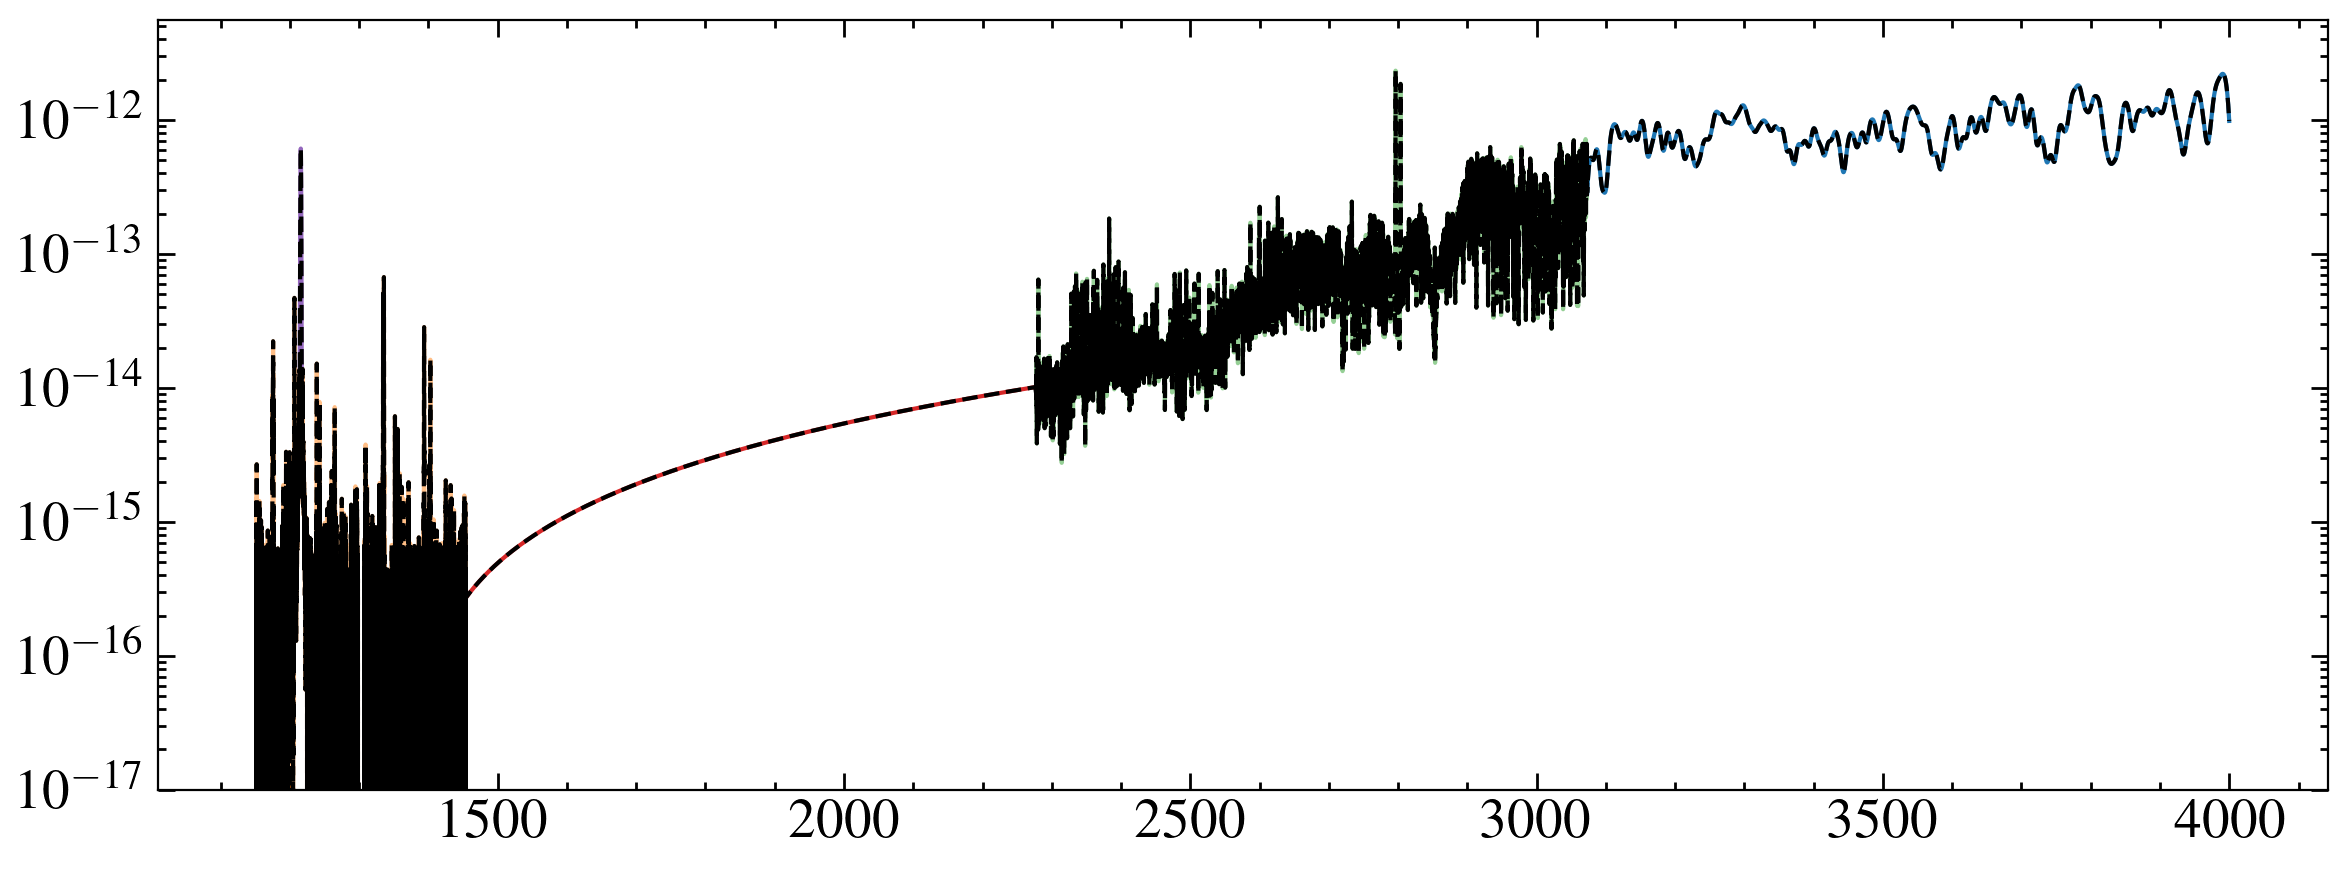

In [96]:
fig, ax = plt.subplots()
star = 'HD189733'
specs_hd18 = ['hst_12984_cos_hd-189733_g130m_lc0u_cspec.fits','hst_15338_stis_hd-189733_e230m_odfv_cspec.fits']

pmask = (pw > 3073) & (pw < 4000)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)

ax.plot(pwi, pfi)

w_all = np.array([], dtype=float) 
f_all = np.array([], dtype=float)
e_all = np.array([], dtype=float)

for spec in specs_hd18:
    data = fits.getdata('{}{}/{}'.format(path,star, spec), 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask =  (w <1214) | (w > 1217.5)
    w, f, e = w[mask], f[mask], e[mask]
    print(w[0], w[-1])

    w_all = np.hstack((w_all, w))
    f_all = np.hstack((f_all, f))
    e_all = np.hstack((e_all, e))
    
    # if fits.getheader('{}{}/{}'.format(path,star, spec), 0)['INSTRUME'] == 'COS':
                
    #             f = convolve(f, Box1DKernel(5))
                
    
    ax.step(w, f, where='mid', alpha=0.5)
    # ax.step(w, e, where='mid', alpha=0.5)

args = np.argsort(w_all)
w_all, f_all, e_all = w_all[args], f_all[args], e_all[args] 

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim(1e-17)
# ax.set_xlim(1100, 3200)

#urgh need more data none available poly fit?
fitter = fitting.LevMarLSQFitter(calc_uncertainties=True)

mod_init=  models.Polynomial1D(2)
fitmask = (w_all > 1425) & (w_all < 2300)
mod_fit = fitter(mod_init, w_all[fitmask], f_all[fitmask])
fitw = np.arange(1454, 2277, 1)
# fitw = np.arange(1400, 2350, 2)

ax.plot(fitw, mod_fit(fitw))

f_lya = 7.69E-13

sd = 0.5

 # Amplitude*SD/0.3989
amp = f_lya / (sd * (2*np.pi)**0.5)

lyamod = models.Gaussian1D(amp, lya, sd)

lya_w = np.arange(1214, 1217.5, 0.1)
ax.plot(lya_w, lyamod(lya_w))

w_all = np.hstack((w_all, pwi, fitw, lya_w))
f_all = np.hstack((f_all, pfi, mod_fit(fitw), lyamod(lya_w)))

args = np.argsort(w_all)
w_all, f_all= w_all[args], f_all[args] 

ax.plot(w_all, f_all, c='k', ls='--')



FileNotFoundError: [Errno 2] No such file or directory: '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/GJ_3470/hst_12920_stis_hd-189733_g140m_oc1f_cspec.fits'

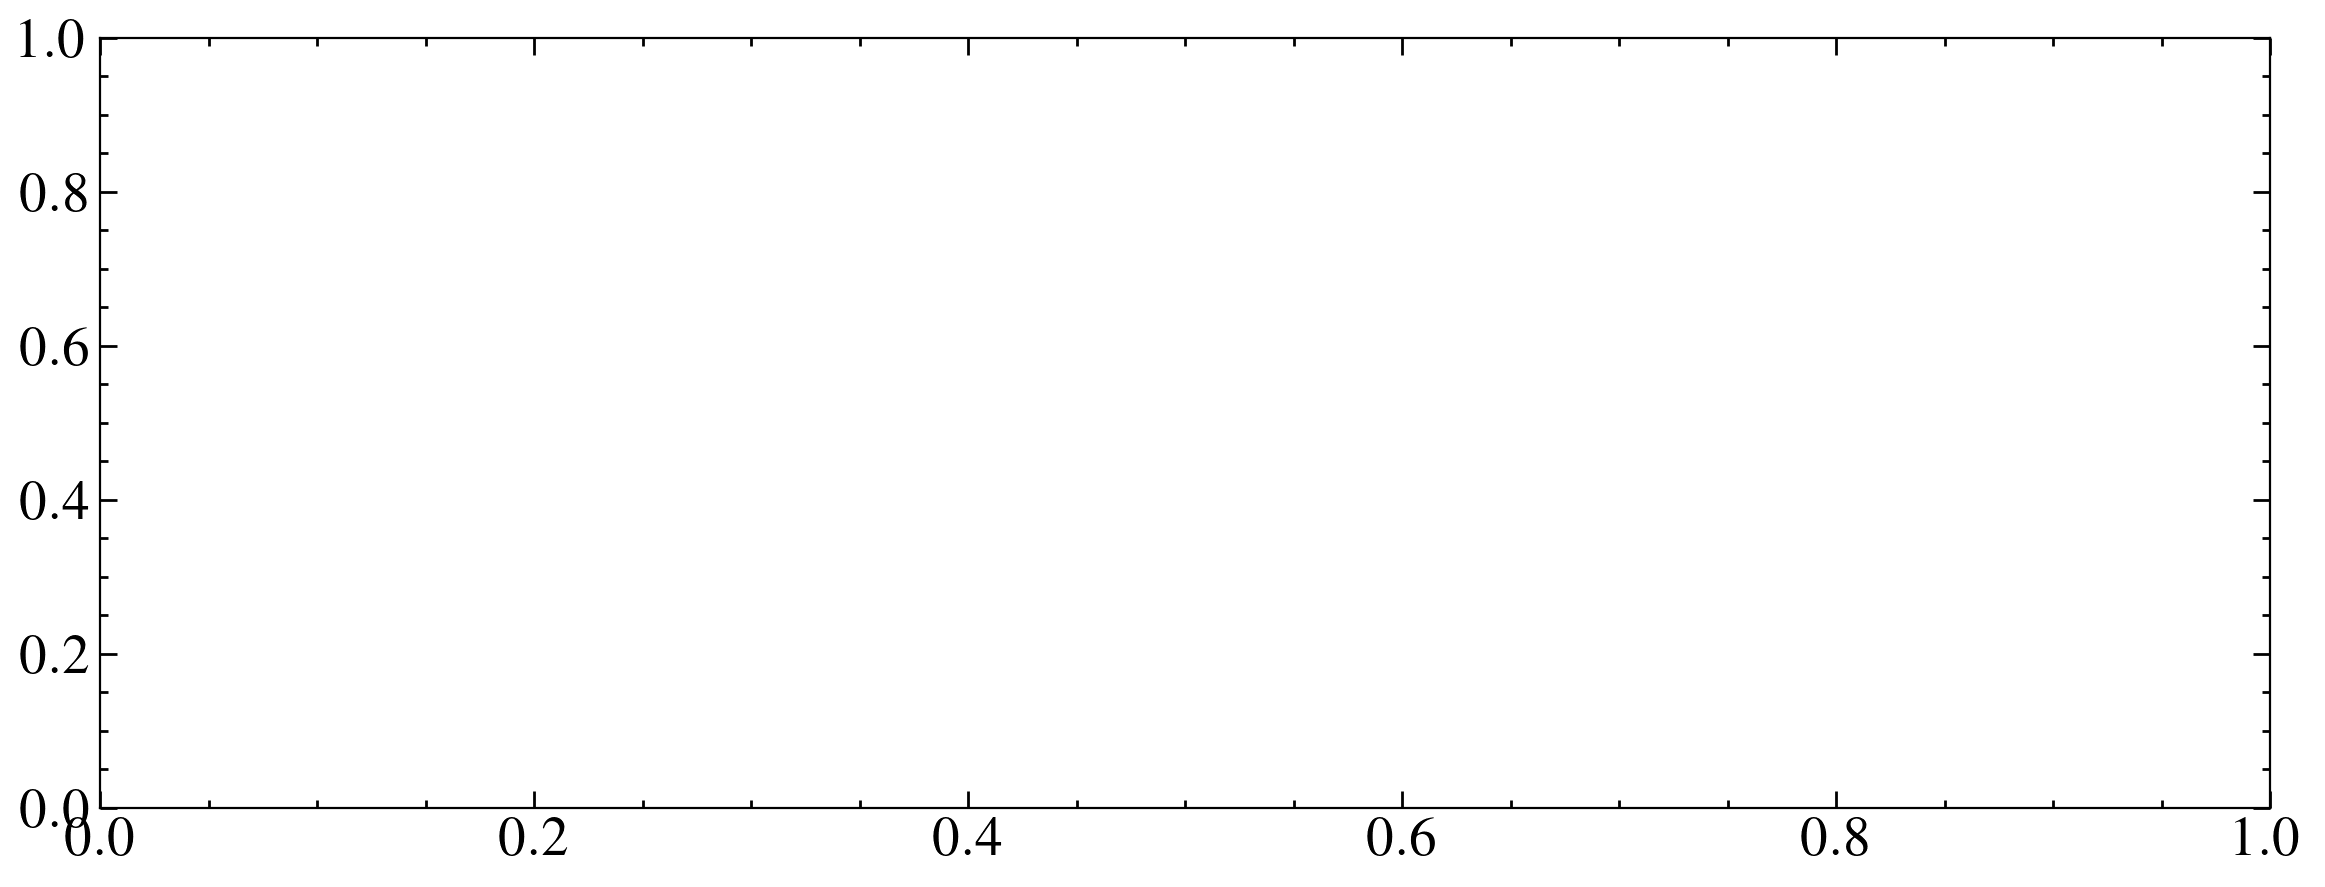

In [13]:
fig, ax = plt.subplots()

lspec = 'hst_12920_stis_hd-189733_g140m_oc1f_cspec.fits'
data = fits.getdata('{}{}/{}'.format(path,star, lspec), 1)[0]
w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

ax.plot(w, f)
sd = 0.5

 # Amplitude*SD/0.3989
amp = f_lya / (sd * (2*np.pi)**0.5)

lyamod = models.Gaussian1D(amp, lya, sd)

lya_w = np.arange(1214, 1217, 0.1)
ax.plot(lya_w, lyamod(lya_w))




Same again for HD209458

In [97]:
mass = 1.069
teff = 6026
teff_e = 97
radius = 1.2
distance = 48.3
save_path = 'models/'
star = 'hd-209458'
g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = np.log10(g.value)
# print(np.log10(g.value))
# g = 4.623
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2
pdata = Table.read('models/hd-209458_phoenix_interpolated.ecsv')
pw, pf, pe =  pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR'] 

1140.5284 1729.4727
2277.775 3072.7285


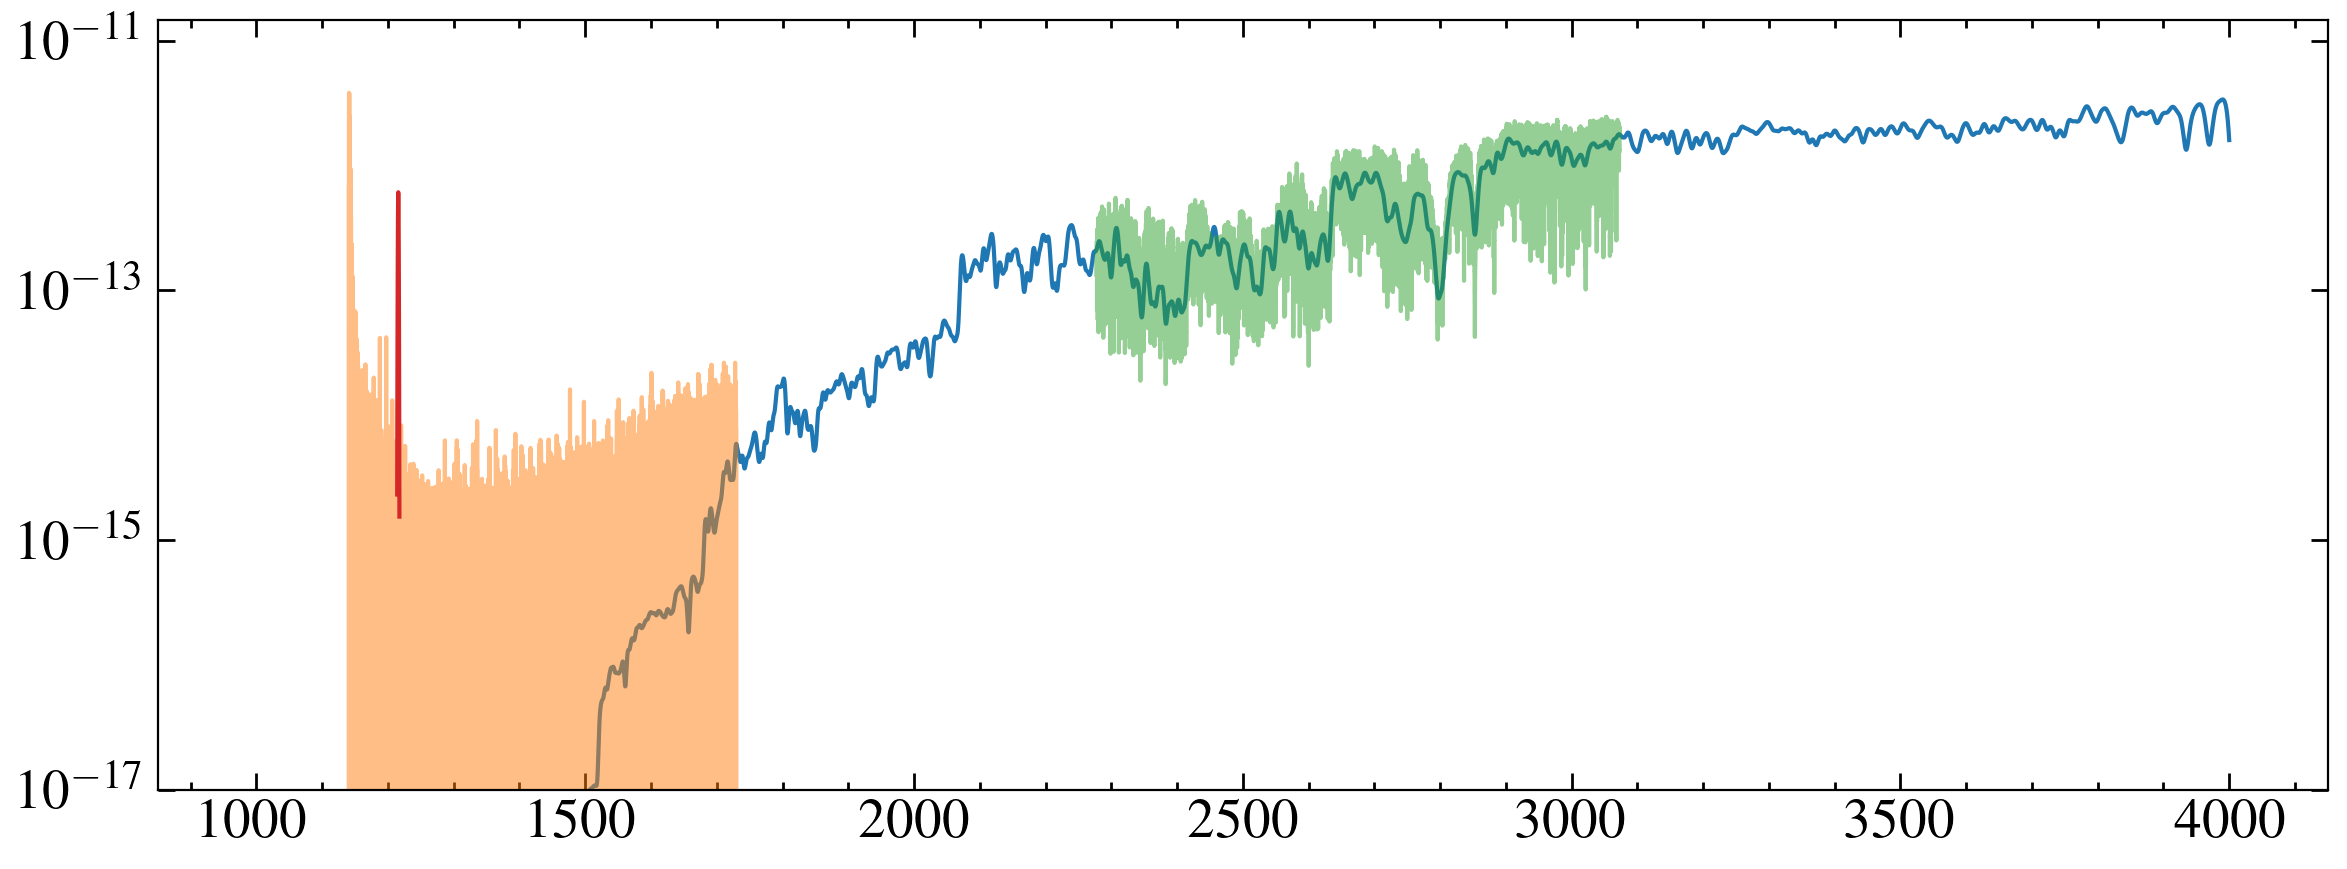

In [102]:
specs_hd20 = ['hst_9064_stis_hd209458_e140m_o6e2_cspec.fits','hst_11576_stis_hd-209458_e230m_ob6j_cspec.fits']



fig, ax = plt.subplots()
star = 'HD209458'

pmask = (pw > 1000) & (pw < 4000)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)

ax.plot(pwi, pfi)

w_all = np.array([], dtype=float) 
f_all = np.array([], dtype=float)
e_all = np.array([], dtype=float)

for spec in specs_hd20:
    data = fits.getdata('{}{}/{}'.format(path,star, spec), 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask =  (w <1214) | (w > 1217.5)
    w, f, e = w[mask], f[mask], e[mask]
    print(w[0], w[-1])

    w_all = np.hstack((w_all, w))
    f_all = np.hstack((f_all, f))
    e_all = np.hstack((e_all, e))
    
    # if fits.getheader('{}{}/{}'.format(path,star, spec), 0)['INSTRUME'] == 'COS':
                
    #             f = convolve(f, Box1DKernel(5))
                
    
    ax.step(w, f, where='mid', alpha=0.5)
    # ax.step(w, e, where='mid', alpha=0.5)

args = np.argsort(w_all)
w_all, f_all, e_all = w_all[args], f_all[args], e_all[args] 

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim(1e-17)
# ax.set_xlim(1100, 3200)

#urgh need more data none available poly fit?
# fitter = fitting.LevMarLSQFitter(calc_uncertainties=True)

# mod_init=  models.Polynomial1D(2)
# fitmask = (w_all > 1425) & (w_all < 2300)
# mod_fit = fitter(mod_init, w_all[fitmask], f_all[fitmask])
# fitw = np.arange(1454, 2277, 1)
# # fitw = np.arange(1400, 2350, 2)

# ax.plot(fitw, mod_fit(fitw))

f_lya = 7.69E-13

sd = 0.5

 # Amplitude*SD/0.3989
amp = f_lya / (sd * (2*np.pi)**0.5)

lyamod = models.Gaussian1D(amp, lya, sd)

lya_w = np.arange(1214, 1217.5, 0.1)
ax.plot(lya_w, lyamod(lya_w))

# w_all = np.hstack((w_all, pwi, fitw, lya_w))
# f_all = np.hstack((f_all, pfi, mod_fit(fitw), lyamod(lya_w)))

# args = np.argsort(w_all)
# w_all, f_all= w_all[args], f_all[args] 

# ax.plot(w_all, f_all, c='k', ls='--')



(1210.0, 1220.0)

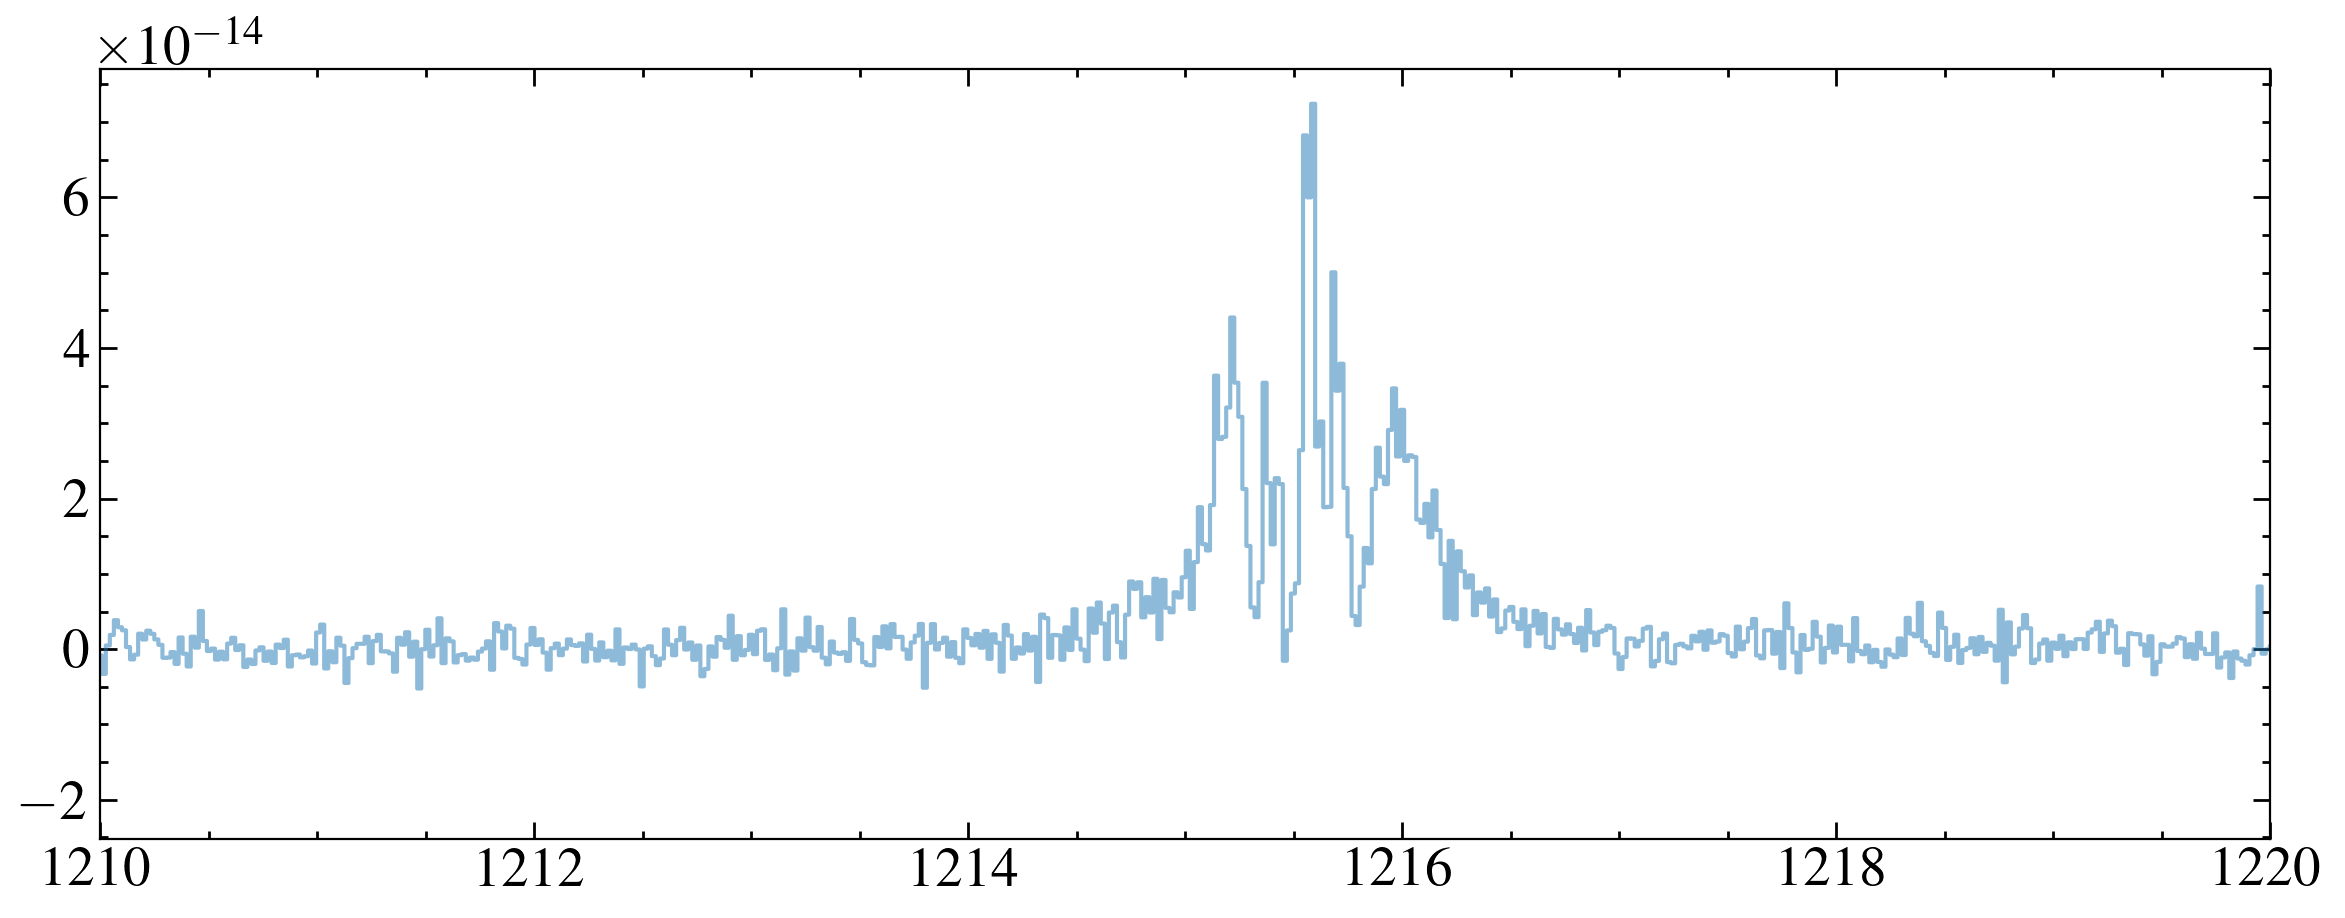

In [106]:
specs_hd20 = ['hst_9064_stis_hd209458_e140m_o6e2_cspec.fits','hst_11576_stis_hd-209458_e230m_ob6j_cspec.fits']



fig, ax = plt.subplots()
star = 'HD209458'




for spec in specs_hd20[0:1]:
    data = fits.getdata('{}{}/{}'.format(path,star, spec), 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask =  (w >1160) 
    w, f, e = w[mask], f[mask], e[mask]
    ax.step(w, f, where='mid', alpha=0.5)

ax.set_xlim(1210,1220)